# Data

https://www.kaggle.com/datasets/alanvourch/tmdb-movies-daily-updates

# prac1.ver2 목표
#### prac1.ver2 목표
- 수년에 걸쳐 변화하는 영화 트렌드 확인하기
- 세부 목표1 : 인기 장르 상위 5개의 2025 인기도(popularity) 예측해보기
    - 월별 그리고 _**분기별 집계**_ 라인차트로 추세와 계절성 파악하기
    - 분석 결과를 _**장르별 개봉 전략**_ 으로 구체화하세요.
      _**(예: "액션 장르는 7월과 12월에 개봉할 때 투표 수 합계가 평균 30% 높다.")**_
- 세부 목표2 : _**2025 데이터로 모델 적합도 검증하기.**_
    - 이후 _**2026년 전망 제시하기**_

#### prac1.ver2 목표를 위한 작업
- 월별, 분기별 장르 인기도를 라인차트로 그리고, 장르별 인기도 추세를 확인한다.
- 연도별 장르 인기도를 누적막대그래프로 그리고, 연도별 인기 장르를 확인한다.
  - 라인차트 : 연도별 TOP 5 장르의 추이를 라인 차트로 시각화.
    - -> _**Heatmap (월별)**_ : 월별 장르별 인기도 (평균 투표 수 등)를 히트맵으로 그려,
        시각적으로 계절성을 즉시 파악합니다.
  - 누적 막대 그래프 : 전체 시장에서 각 장르가 차지하는 비중 (Share) 변화를 확인.
      - -> _**분산형 차트 (Scatter Plot)**_: 인기도 vs. 평점 관계를 장르별로 시각화하여,
            '투표 수는 많지만 평점은 낮은' 장르를 식별합니다.

        
  - 시계열 분해 (Decomposition): TOP 5 장르 시계열 데이터에 대해 추세, 계절성, 잔차를 분리하여 시각화합니다.
      - -> _**잔차 분석**_ 을 통해 트렌드나 계절성으로 설명되지 않는 **특이한 해(Year)** 를 찾아냅니다.
- 연도별 인기도와 관심도(투표수)의 통계를 표로 확인한다.
- 시계열 데이터의 예측은 주로 통계적 기법인 arma/arima/sarima를 사용한다.
    - SARIMA 모델
        - -> _**Holt-Winters**_ 지수 평활법과 같은
      더 단순한 모델로 예측을 시도해 보세요. 복잡한 SARIMA보다 단순 모델이 더 나은 성능을 보이거나,
      계산 및 해석의 기준점(Baseline)을 제공할 수 있습니다.

# columns
Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'budget', 'popularity', 'genres',
       'production_companies', 'production_countries', 'cast', 'director',
       'director_of_photography', 'writers', 'producers', 'music_composer',
       'imdb_rating', 'imdb_votes', 'year', 'month', 'day', 'profit_ratio',
       'genres_parsed', 'genre_Action', 'genre_Adventure', 'genre_Animation',
       'genre_Comedy', 'genre_Crime', 'genre_Documentary', 'genre_Drama',
       'genre_Family', 'genre_Fantasy', 'genre_History', 'genre_Horror',
       'genre_Music', 'genre_Mystery', 'genre_Romance',
       'genre_Science Fiction', 'genre_TV Movie', 'genre_Thriller',
       'genre_War', 'genre_Western', 'log_budget', 'log_revenue',
       'log_profit_ratio'],
      dtype='object')

# Required columns
    - ko: id, 제목, 평점(둘다), 관객수, 평점, 참가한 수, 장르, 릴리즈 데이트 
    - columns: id, title, vote_average, genre, release_date, 
    - add : revenue(Box office revenue in USD):평점으로는 판단할 수 없는 실제 수익(인기정도), 
            budget(Production budget in USD):인기 많은 영화는 예산이 어느정도 투자되는가,
            

### *참고할 그래프 종류

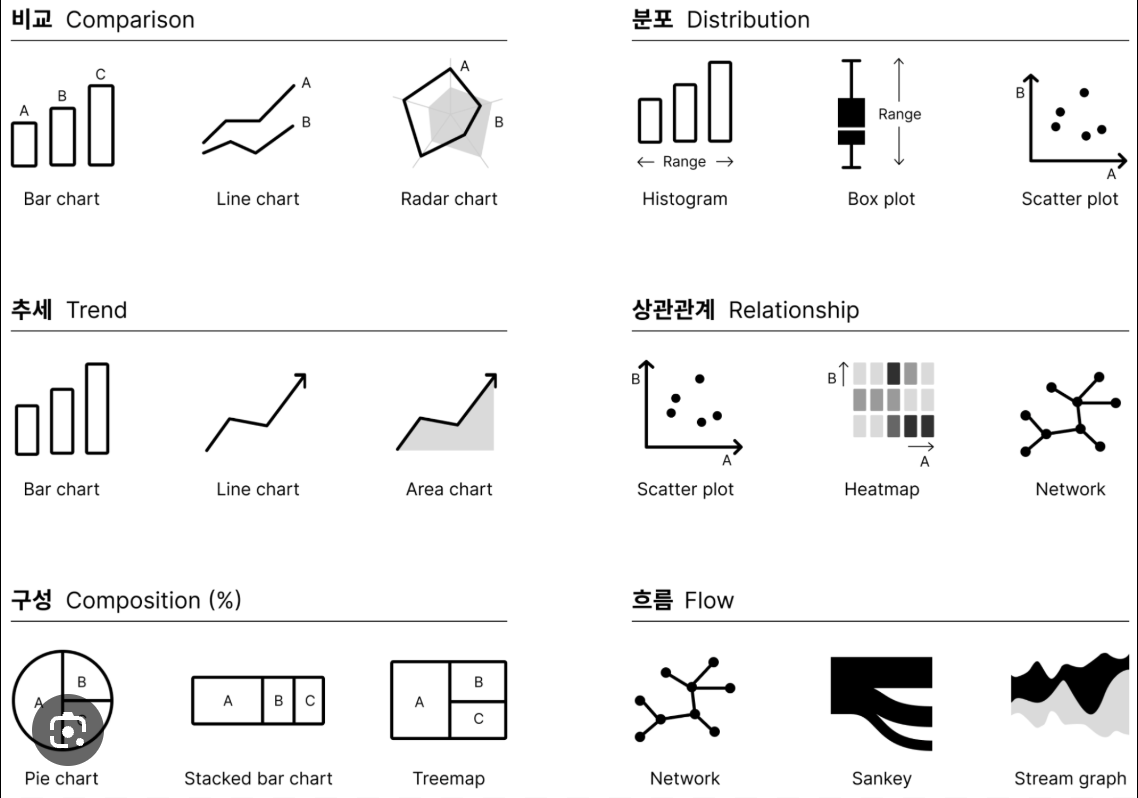

# ⭐️분석 시작

## 1. 2024+2025 데이터 준비

/kaggle/input/tmdb-raw-data/TMDB_all_movies.csv

## 2. 필요한 컬럼만 남기기 

In [1]:
import pandas as pd
import os

# --- 설정 (Configuration) ---

# 입력 파일 경로 (사용자가 제공한 Kaggle 경로)
INPUT_FILE_PATH = '/kaggle/input/tmdb-raw-data/TMDB_all_movies.csv'

# 출력 파일 경로 (Kaggle working 디렉토리)
OUTPUT_DIR = '/kaggle/working/'
# (한글 주석) 필터링된 데이터임을 나타내도록 파일명 변경
OUTPUT_FILE_NAME = 'selected_tmdb_data_2010-2025.csv'
OUTPUT_FILE_PATH = os.path.join(OUTPUT_DIR, OUTPUT_FILE_NAME)

# 선택할 컬럼 목록
REQUIRED_COLUMNS = [
    'id',
    'title',
    'budget',
    'release_date',
    'popularity',
    'genres',
    'production_companies',
    'production_countries',
    'cast',
    'director',
    'writers'
]

# (한글 주석) 필터링할 연도 범위 설정
YEAR_START = 2010
YEAR_END = 2025

print("--- TMDB 데이터 필터링 및 선택 스크립트 시작 ---")
print(f"입력 파일: {INPUT_FILE_PATH}")
print(f"(한글 주석) {YEAR_START}년부터 {YEAR_END}년까지의 데이터를 추출합니다.")

try:
    # 1. CSV 파일 읽기
    # (한글 주석) read_csv에서 usecols 매개변수를 사용하여 필요한 컬럼만 효율적으로 읽어옵니다.
    # (한글 주석) release_date 컬럼을 바로 파싱하지 않습니다. (형식 다양성 때문)
    df = pd.read_csv(INPUT_FILE_PATH, usecols=REQUIRED_COLUMNS)
    print(f"원본 데이터 로드 완료. (총 {len(df)} 행)")

    # 2. 'release_date' 컬럼 전처리 및 필터링
    
    # (한글 주석) 2-1: release_date를 datetime 객체로 변환합니다.
    # (한글 주석) errors='coerce'는 파싱(변환)할 수 없는 날짜를 NaT (Not a Time)로 강제 변환합니다.
    print(f"\n(한글 주석) 'release_date' 컬럼을 날짜 형식으로 변환 중...")
    df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

    # (한글 주석) 2-2: 유효하지 않은 날짜(NaT)를 가진 행을 제거합니다.
    original_row_count = len(df)
    df = df.dropna(subset=['release_date'])
    dropped_rows = original_row_count - len(df)
    print(f"(한글 주석) 유효하지 않은 날짜(NaT)를 가진 {dropped_rows}개 행 제거 완료.")

    # (한글 주석) 2-3: 연도(year) 컬럼을 새로 만듭니다.
    df['year'] = df['release_date'].dt.year

    # (한글 주석) 2-4: 정의된 연도 범위(YEAR_START ~ YEAR_END)로 데이터를 필터링합니다.
    print(f"(한글 주석) {YEAR_START}년 ~ {YEAR_END}년 데이터 필터링 중...")
    df_filtered = df[(df['year'] >= YEAR_START) & (df['year'] <= YEAR_END)].copy()
    
    # (한글 주석) 'year' 컬럼은 필터링에만 사용했으므로 최종 파일에는 포함되지 않도록 원본 컬럼만 선택합니다.
    # (한글 주석) copy()를 사용했기 때문에 원본 컬럼 순서를 보장합니다.
    df_to_save = df_filtered[REQUIRED_COLUMNS]

    # 3. 결과 DataFrame 확인
    print(f"\n필터링 완료. 총 {len(df_to_save)} 행이 선택되었습니다.")
    print("\n선택된 DataFrame 미리보기:")
    print(df_to_save.head())
    print(f"\nDataFrame 정보: {df_to_save.shape} (행, 열)")
    print(f"선택된 컬럼 목록: {list(df_to_save.columns)}")
    
    # 4. 새로운 CSV 파일로 저장 (Kaggle working 디렉토리에 저장)
    # (한글 주석) index=False 옵션을 사용하여 DataFrame 인덱스는 파일에 저장하지 않습니다.
    df_to_save.to_csv(OUTPUT_FILE_PATH, index=False)
    
    print(f"\n✅ 성공적으로 완료되었습니다!")
    print(f"결과 파일이 다음 위치에 저장되었습니다: {OUTPUT_FILE_PATH}")

except FileNotFoundError:
    print(f"\n❌ 오류: 파일을 찾을 수 없습니다. 경로를 다시 확인해 주세요: {INPUT_FILE_PATH}")
except ValueError as e:
    print(f"\n❌ 오류: 지정된 컬럼 중 일부가 데이터 파일에 없습니다. 오류 내용: {e}")
    print(f"요청된 컬럼: {REQUIRED_COLUMNS}")
except Exception as e:
    print(f"\n❌ 예기치 않은 오류가 발생했습니다: {e}")

print("\n--- TMDB 데이터 필터링 및 선택 스크립트 종료 ---")

--- TMDB 데이터 필터링 및 선택 스크립트 시작 ---
입력 파일: /kaggle/input/tmdb-raw-data/TMDB_all_movies.csv
(한글 주석) 2010년부터 2025년까지의 데이터를 추출합니다.
원본 데이터 로드 완료. (총 1124379 행)

(한글 주석) 'release_date' 컬럼을 날짜 형식으로 변환 중...
(한글 주석) 유효하지 않은 날짜(NaT)를 가진 116055개 행 제거 완료.
(한글 주석) 2010년 ~ 2025년 데이터 필터링 중...

필터링 완료. 총 540332 행이 선택되었습니다.

선택된 DataFrame 미리보기:
        id                                        title       budget  \
148    189                 Sin City: A Dame to Kill For   65000000.0   
1164  1771           Captain America: The First Avenger  140000000.0   
1238  1865  Pirates of the Caribbean: On Stranger Tides  379000000.0   
1294  1930                       The Amazing Spider-Man  215000000.0   
1530  2203                   Für ein paar Filme mehr...          0.0   

     release_date  popularity                              genres  \
148    2014-08-20     12.3013             Action, Crime, Thriller   
1164   2011-07-22      8.0479  Action, Adventure, Science Fiction   
1238   2011-05-15     23.2221  

## 3. 여러 장르를 행으로 나눠 저장/ 결측치 제거 

In [2]:
import pandas as pd
import os

# --- 설정 (Configuration) ---

# 이전 단계에서 저장된 파일 경로 (입력 파일)
INPUT_FILE_PATH = '/kaggle/working/selected_tmdb_data_2010-2025.csv'

# 최종 출력 파일 경로
OUTPUT_DIR = '/kaggle/working/'
OUTPUT_FILE_NAME = 'final_processed_tmdb_data_exploded.csv' # 파일 이름 변경
OUTPUT_FILE_PATH = os.path.join(OUTPUT_DIR, OUTPUT_FILE_NAME)

# 쉼표로 구분된 값을 개별 행으로 분리할 컬럼 목록 (Explode 대상)
COLUMNS_TO_EXPLODE = [
    'genres',
    'production_countries',
    'director',
    'writers'
]

print("--- 데이터 전처리 및 Explode 스크립트 시작 ---")
print(f"입력 파일: {INPUT_FILE_PATH}")

try:
    # 1. 데이터 로드
    df = pd.read_csv(INPUT_FILE_PATH)
    initial_rows = len(df)
    print(f"데이터 로드 완료. 초기 행 수: {initial_rows}")

    # 2. 결측치 (NaN) 제거
    # 데이터프레임의 어떤 컬럼이라도 결측치가 있는 행은 모두 제거합니다.
    df_cleaned = df.dropna().copy()
    rows_after_dropna = len(df_cleaned)
    print(f"✅ 결측치 제거 완료. 제거된 행: {initial_rows - rows_after_dropna}, 남은 행: {rows_after_dropna}")
    
    # 결측치 제거 후에도 데이터가 남아있는지 확인
    if df_cleaned.empty:
        print("경고: 결측치 제거 후 데이터가 비어있습니다. 스크립트를 종료합니다.")
        # 종료 대신 빈 파일을 생성할 수도 있지만, 여기서는 오류 메시지를 출력합니다.
        exit()

    # 3. Explode할 컬럼 전처리 및 분리 (Exploding)
    df_processed = df_cleaned.copy()
    
    for col in COLUMNS_TO_EXPLODE:
        # 3.1. 모든 값을 문자열로 변환하고 양쪽 공백 제거
        df_processed.loc[:, col] = df_processed[col].astype(str).str.strip()
        
        # 3.2. 쉼표(,)를 기준으로 분리하여 리스트 형태로 변환
        # .str.split(',')는 문자열을 리스트로 만듭니다.
        df_processed.loc[:, col] = df_processed[col].str.split(',')
        
        # 3.3. 리스트의 각 요소를 개별 행으로 분리 (Explode)
        df_processed = df_processed.explode(col)
        
        # 3.4. Explode 후 발생할 수 있는 추가 공백 제거
        df_processed.loc[:, col] = df_processed[col].str.strip()
        
        # 3.5. 분리된 값이 빈 문자열이거나 'None', 'Unknown'인 경우의 행 제거 
        # (데이터를 깔끔하게 유지하기 위한 추가 단계)
        df_processed = df_processed[df_processed[col] != ''].copy()
        df_processed = df_processed[df_processed[col] != 'None'].copy()
        df_processed = df_processed[df_processed[col] != 'Unknown'].copy()
        
        print(f"   > '{col}' 컬럼 Explode 완료. 현재 행 수: {len(df_processed)}")


    # 4. 최종 결과 확인
    final_rows = len(df_processed)
    print(f"\n최종 처리된 데이터의 행 수: {final_rows}")
    print("\n최종 DataFrame (Explode 적용) 미리보기:")
    # Explode된 컬럼을 포함하여 출력 (예시로 genres)
    print(df_processed[['id', 'title', 'genres', 'director']].head())
    
    # 5. 새로운 CSV 파일로 저장
    df_processed.to_csv(OUTPUT_FILE_PATH, index=False)
    
    print(f"\n✅ 데이터 전처리 및 Explode 작업이 이전 방식으로 성공적으로 복원되었습니다!")
    print(f"결과 파일이 다음 위치에 저장되었습니다: {OUTPUT_FILE_PATH}")

except FileNotFoundError:
    print(f"\n❌ 오류: 이전 단계의 입력 파일({INPUT_FILE_PATH})을 찾을 수 없습니다. 경로를 확인해 주세요.")
except Exception as e:
    print(f"\n❌ 예기치 않은 오류가 발생했습니다: {e}")
    import traceback
    print(traceback.format_exc())

print("\n--- 스크립트 종료 ---")


--- 데이터 전처리 및 Explode 스크립트 시작 ---
입력 파일: /kaggle/working/selected_tmdb_data_2010-2025.csv
데이터 로드 완료. 초기 행 수: 540332
✅ 결측치 제거 완료. 제거된 행: 405925, 남은 행: 134407
   > 'genres' 컬럼 Explode 완료. 현재 행 수: 241946
   > 'production_countries' 컬럼 Explode 완료. 현재 행 수: 289853
   > 'director' 컬럼 Explode 완료. 현재 행 수: 333297
   > 'writers' 컬럼 Explode 완료. 현재 행 수: 732624

최종 처리된 데이터의 행 수: 732624

최종 DataFrame (Explode 적용) 미리보기:
    id                         title    genres          director
0  189  Sin City: A Dame to Kill For    Action      Frank Miller
0  189  Sin City: A Dame to Kill For    Action  Robert Rodriguez
0  189  Sin City: A Dame to Kill For     Crime      Frank Miller
0  189  Sin City: A Dame to Kill For     Crime  Robert Rodriguez
0  189  Sin City: A Dame to Kill For  Thriller      Frank Miller

✅ 데이터 전처리 및 Explode 작업이 이전 방식으로 성공적으로 복원되었습니다!
결과 파일이 다음 위치에 저장되었습니다: /kaggle/working/final_processed_tmdb_data_exploded.csv

--- 스크립트 종료 ---


## 4. 인기도 시각화 


### 4-1. '영화'의 월별/분기별/연도별 인기도 라인차트

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Monthly popularity chart saved to /kaggle/working/monthly_popularity_chart.png


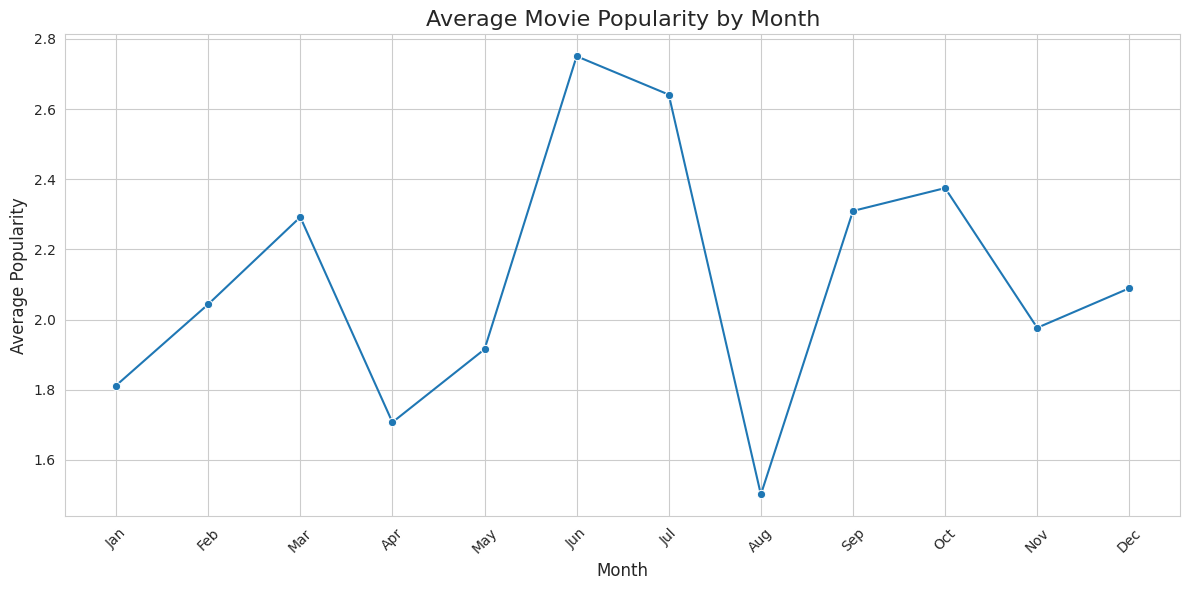

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Quarterly popularity chart saved to /kaggle/working/quarterly_popularity_chart.png


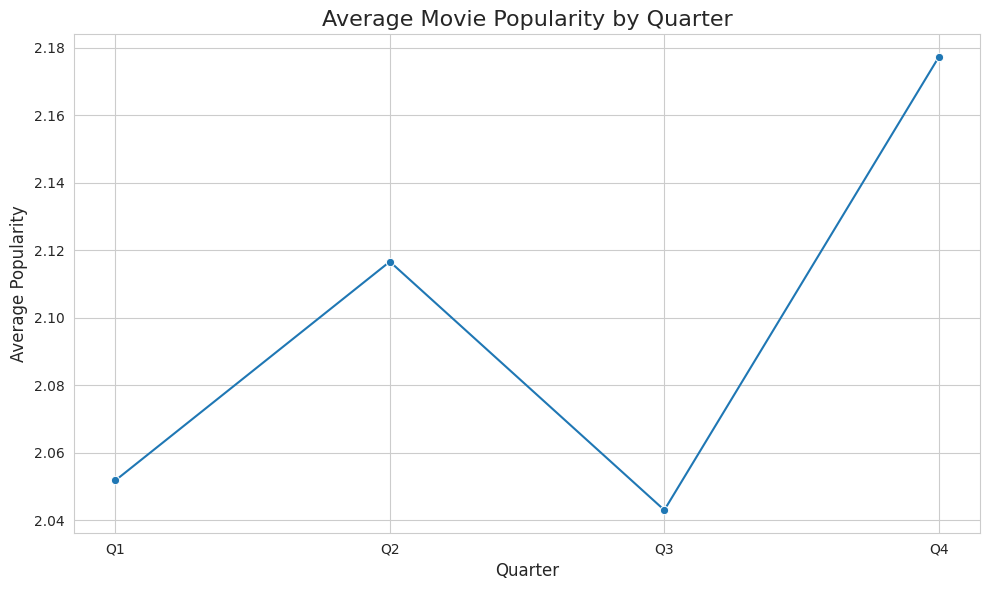

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Yearly popularity chart saved to /kaggle/working/yearly_popularity_chart.png


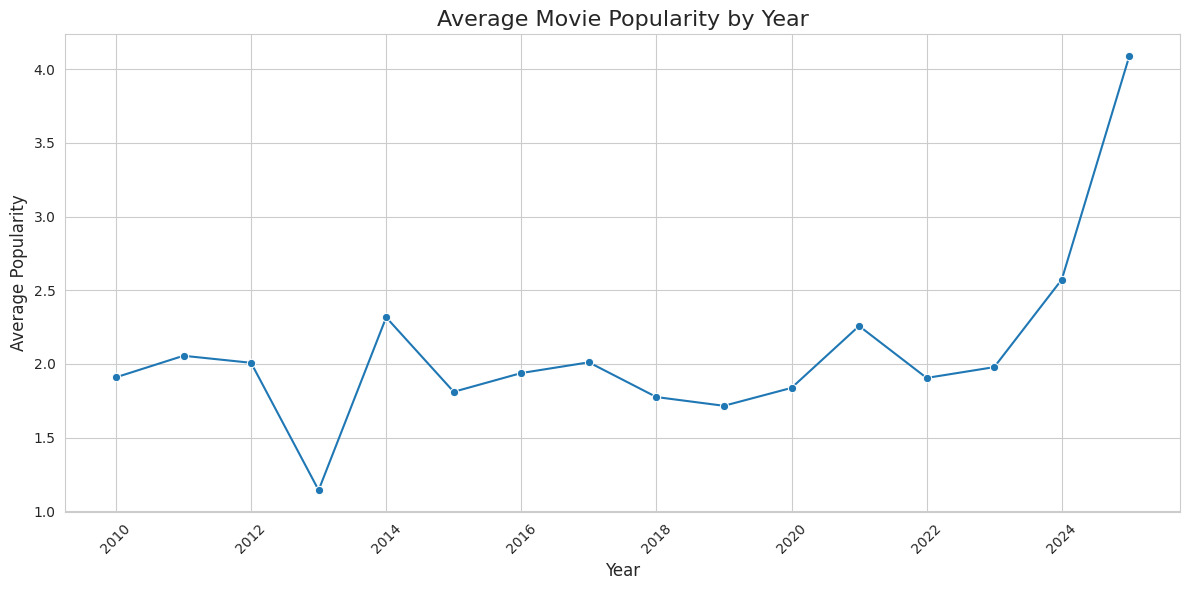

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

def generate_popularity_charts(input_path, output_dir):
    """
    (한글 주석)
    영화 데이터를 불러와 'release_date'를 기준으로
    월별 및 분기별 평균 인기도를 계산하고,
    이를 라인 차트로 저장 및 표시합니다.

    Args:
        input_path (str): 입력 CSV 파일 경로
        output_dir (str): 출력 차트 저장 디렉토리
    """
    
    # --- 1. 데이터 불러오기 ---
    try:
        df = pd.read_csv(input_path)
    except FileNotFoundError:
        print(f"Error: Input file not found at {input_path}")
        return
    except Exception as e:
        print(f"Error loading CSV: {e}")
        return

    # --- 2. 데이터 전처리 ---
    
    # 필수 컬럼('release_date', 'popularity') 확인
    if 'release_date' not in df.columns or 'popularity' not in df.columns:
        print("Error: 'release_date' or 'popularity' column not found.")
        print("Available columns are:", df.columns.tolist())
        return

    # 'release_date' 컬럼을 datetime 객체로 변환합니다.
    # 변환할 수 없는 날짜는 NaT (Not a Time)으로 처리됩니다.
    df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

    # 'popularity' 컬럼을 숫자형으로 변환합니다.
    df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')

    # 날짜 또는 인기도 변환에 실패한 행(NaT 또는 Na)을 제거합니다.
    df.dropna(subset=['release_date', 'popularity'], inplace=True)


    # --- 3. 피처 엔지니어링 (날짜 특징 추출) ---
    df['month'] = df['release_date'].dt.month
    df['quarter'] = df['release_date'].dt.quarter
    df['year'] = df['release_date'].dt.year # 연도 추출 추가
    
    # --- 4. 월별 인기도 차트 ---
    try:
        # 월별 평균 인기도 계산
        monthly_popularity = df.groupby('month')['popularity'].mean().reset_index()
        
        # 1월부터 12월까지 순서대로 정렬
        monthly_popularity = monthly_popularity.sort_values(by='month')
        
        # x축 레이블을 위한 영어 월 약어
        month_map = {
            1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
            7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
        }
        monthly_popularity['month_name'] = monthly_popularity['month'].map(month_map)
        
        plt.figure(figsize=(12, 6))
        sns.set_style("whitegrid")
        ax = sns.lineplot(
            data=monthly_popularity, 
            x='month_name', 
            y='popularity', 
            marker='o',
            sort=False  # 월 번호로 미리 정렬했으므로 x축 순서 변경 안함
        )
        
        plt.title('Average Movie Popularity by Month', fontsize=16)
        plt.xlabel('Month', fontsize=12)
        plt.ylabel('Average Popularity', fontsize=12)
        plt.xticks(rotation=45)
        plt.tight_layout()
        
        # 차트 저장
        monthly_chart_path = os.path.join(output_dir, 'monthly_popularity_chart.png')
        plt.savefig(monthly_chart_path)
        print(f"Monthly popularity chart saved to {monthly_chart_path}")
        
        # 차트 표시
        plt.show()
        plt.close()

    except Exception as e:
        print(f"Error generating monthly chart: {e}")

    # --- 5. 분기별 인기도 차트 ---
    try:
        # 분기별 평균 인기도 계산
        quarterly_popularity = df.groupby('quarter')['popularity'].mean().reset_index()
        
        # 1분기부터 4분기까지 정렬
        quarterly_popularity = quarterly_popularity.sort_values(by='quarter')

        # 분기 이름 정의
        quarter_map = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}
        quarterly_popularity['quarter_name'] = quarterly_popularity['quarter'].map(quarter_map)

        plt.figure(figsize=(10, 6))
        sns.set_style("whitegrid")
        ax_q = sns.lineplot(
            data=quarterly_popularity, 
            x='quarter_name', 
            y='popularity', 
            marker='o',
            sort=False # 미리 정렬했으므로 x축 순서 변경 안함
        )
        
        plt.title('Average Movie Popularity by Quarter', fontsize=16)
        plt.xlabel('Quarter', fontsize=12)
        plt.ylabel('Average Popularity', fontsize=12)
        plt.tight_layout()
        
        # 차트 저장
        quarterly_chart_path = os.path.join(output_dir, 'quarterly_popularity_chart.png')
        plt.savefig(quarterly_chart_path)
        print(f"Quarterly popularity chart saved to {quarterly_chart_path}")
        
        # 차트 표시
        plt.show()
        plt.close()

    except Exception as e:
        print(f"Error generating quarterly chart: {e}")


    # --- 6. 연도별 인기도 차트 (추가된 부분) ---
    try:
        # 연도별 평균 인기도 계산
        yearly_popularity = df.groupby('year')['popularity'].mean().reset_index()
        
        # 연도순으로 정렬
        yearly_popularity = yearly_popularity.sort_values(by='year')

        plt.figure(figsize=(12, 6))
        sns.set_style("whitegrid")
        ax_y = sns.lineplot(
            data=yearly_popularity, 
            x='year', 
            y='popularity', 
            marker='o'
        )
        
        # x축 레이블을 정수로 표시
        ax_y.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
        
        plt.title('Average Movie Popularity by Year', fontsize=16)
        plt.xlabel('Year', fontsize=12)
        plt.ylabel('Average Popularity', fontsize=12)
        plt.xticks(rotation=45)
        plt.tight_layout()
        
        # 차트 저장
        yearly_chart_path = os.path.join(output_dir, 'yearly_popularity_chart.png')
        plt.savefig(yearly_chart_path)
        print(f"Yearly popularity chart saved to {yearly_chart_path}")
        
        # 차트 표시
        plt.show()
        plt.close()

    except Exception as e:
        print(f"Error generating yearly chart: {e}")




if __name__ == "__main__":
    # 파일 경로 정의
    INPUT_FILE = "/kaggle/working/final_processed_tmdb_data_exploded.csv"
    OUTPUT_DIR = "/kaggle/working/"
    
    # 출력 디렉토리가 없으면 생성
    if not os.path.exists(OUTPUT_DIR):
        os.makedirs(OUTPUT_DIR)
        
    generate_popularity_charts(INPUT_FILE, OUTPUT_DIR)

### 4-2. 영화 '장르'의 월별/분기별/연도별 인기도 시각화 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

Monthly genre popularity chart saved to /kaggle/working/monthly_genre_popularity_chart.png


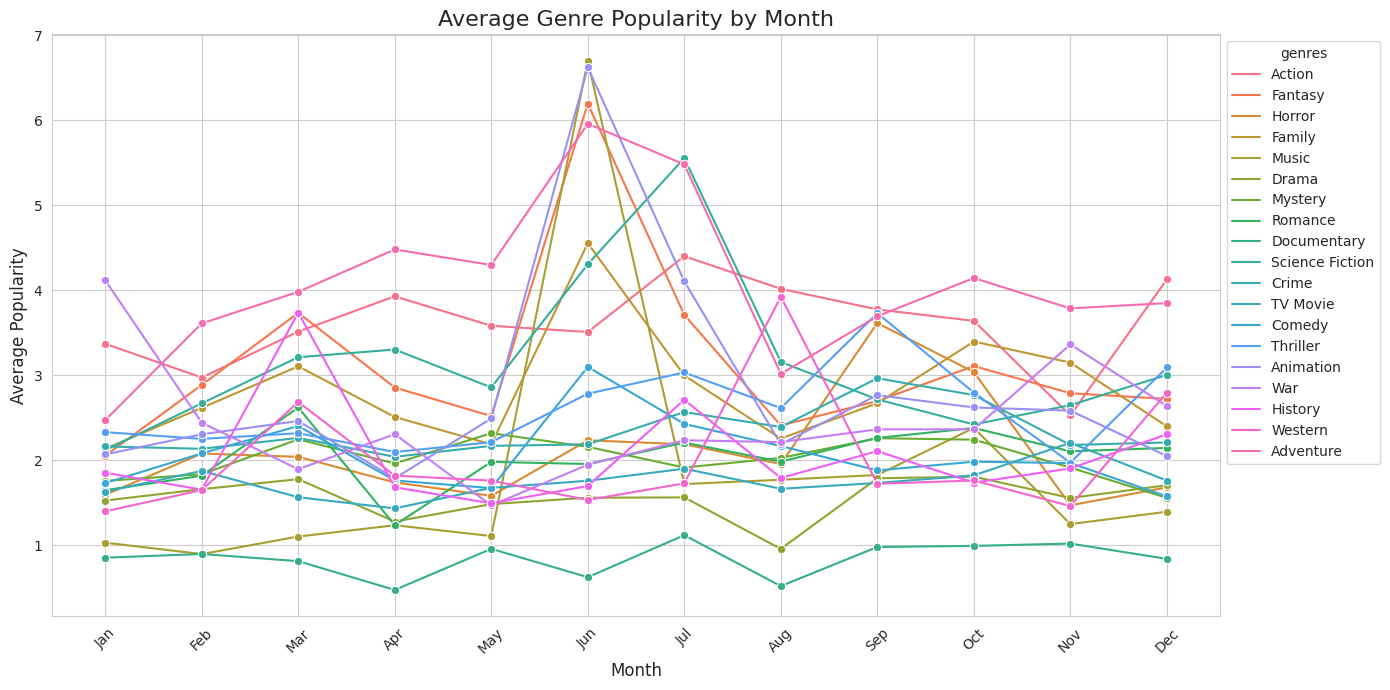

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

Quarterly genre popularity chart saved to /kaggle/working/quarterly_genre_popularity_chart.png


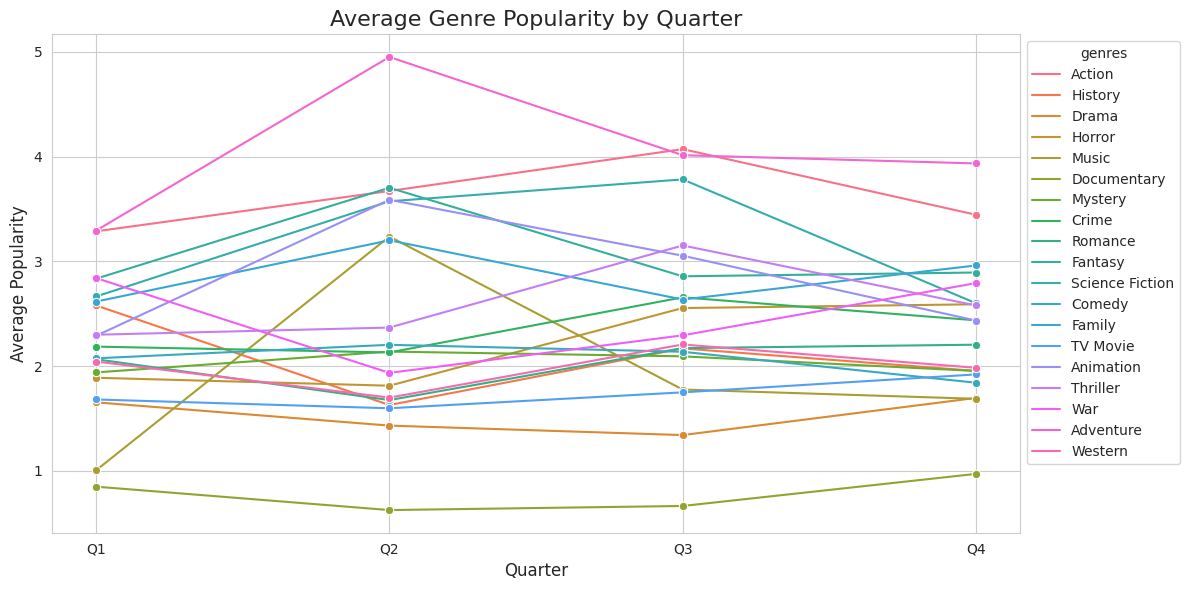

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

Yearly genre popularity chart saved to /kaggle/working/yearly_genre_popularity_chart.png


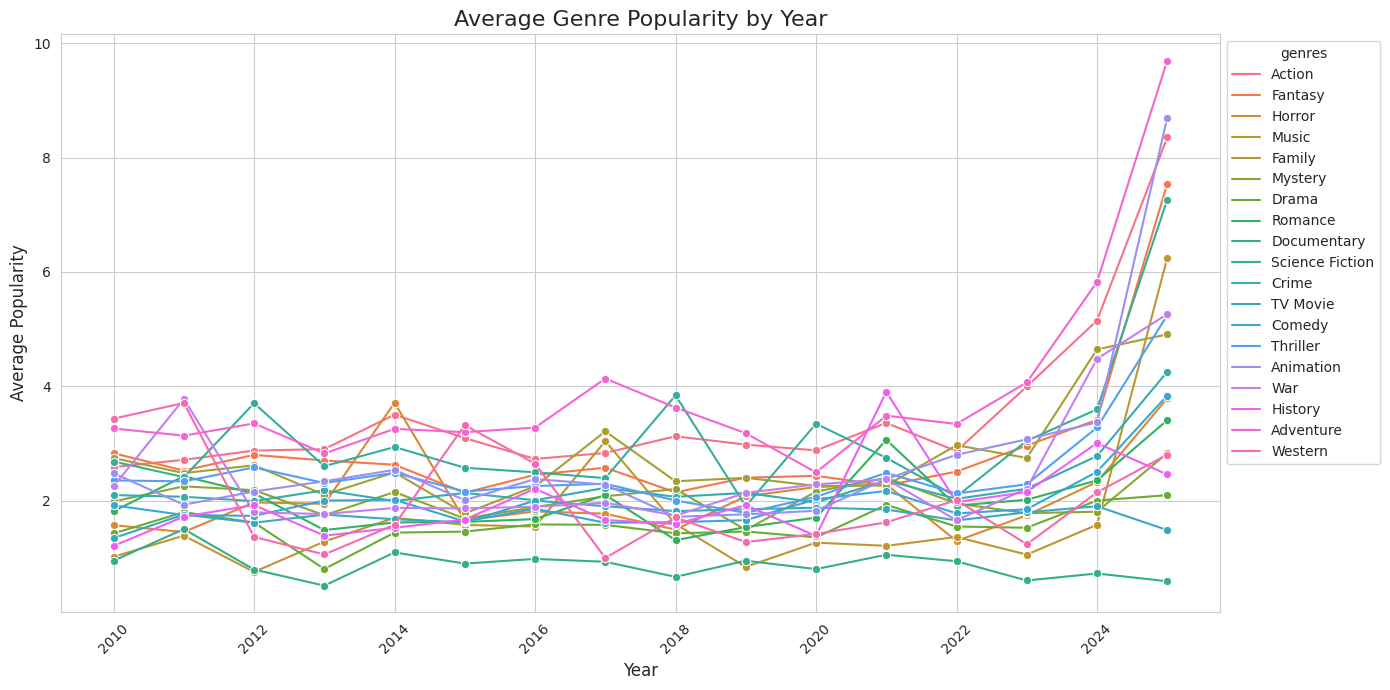

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# (한글 주석)
# matplotlib에서 x축의 정수 로케이터를 사용하기 위해 import합니다.
from matplotlib.ticker import MaxNLocator

def generate_genre_popularity_charts(input_path, output_dir):
    """
    (한글 주석)
    영화 데이터를 불러와 'release_date'와 'genres'를 기준으로
    장르별 월별, 분기별, 연도별 평균 인기도를 계산하고,
    이를 라인 차트로 저장 및 표시합니다.

    Args:
        input_path (str): 입력 CSV 파일 경로
        output_dir (str): 출력 차트 저장 디렉토리
    """
    
    # --- 1. 데이터 불러오기 ---
    try:
        df = pd.read_csv(input_path)
    except FileNotFoundError:
        print(f"Error: Input file not found at {input_path}")
        return
    except Exception as e:
        print(f"Error loading CSV: {e}")
        return

    # --- 2. 데이터 전처리 ---
    
    # (한글 주석) 필수 컬럼('release_date', 'popularity', 'genres') 확인
    required_cols = ['release_date', 'popularity', 'genres']
    if not all(col in df.columns for col in required_cols):
        print(f"Error: Missing one or more required columns: {required_cols}")
        print("Available columns are:", df.columns.tolist())
        return

    # 'release_date' 컬럼을 datetime 객체로 변환
    df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

    # 'popularity' 컬럼을 숫자형으로 변환
    df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')

    # (한글 주석) 날짜, 인기도, 장르 중 하나라도 유효하지 않은 데이터(NaT, Na)가 있는 행 제거
    df.dropna(subset=required_cols, inplace=True)

    # --- 3. 피처 엔지니어링 (날짜 특징 추출) ---
    df['month'] = df['release_date'].dt.month
    df['quarter'] = df['release_date'].dt.quarter
    df['year'] = df['release_date'].dt.year
    
    # --- 4. 월별 장르 인기도 차트 ---
    try:
        # (한글 주석) 장르와 월별로 그룹화하여 평균 인기도 계산
        monthly_genre_pop = df.groupby(['genres', 'month'])['popularity'].mean().reset_index()
        
        # 1월부터 12월까지 순서대로 정렬
        monthly_genre_pop = monthly_genre_pop.sort_values(by='month')
        
        # x축 레이블을 위한 영어 월 약어
        month_map = {
            1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
            7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
        }
        monthly_genre_pop['month_name'] = monthly_genre_pop['month'].map(month_map)
        
        plt.figure(figsize=(14, 7))
        sns.set_style("whitegrid")
        ax = sns.lineplot(
            data=monthly_genre_pop, 
            x='month_name', 
            y='popularity', 
            hue='genres',  # (한글 주석) 장르별로 색상 구분
            marker='o',
            sort=False
        )
        
        plt.title('Average Genre Popularity by Month', fontsize=16)
        plt.xlabel('Month', fontsize=12)
        plt.ylabel('Average Popularity', fontsize=12)
        plt.xticks(rotation=45)
        
        # (한글 주석) 범례를 차트 우측 바깥으로 이동
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
        
        # (한글 주석) 범례가 잘리지 않도록 레이아웃 조정
        plt.tight_layout()
        
        # 차트 저장 (범례 포함)
        monthly_chart_path = os.path.join(output_dir, 'monthly_genre_popularity_chart.png')
        plt.savefig(monthly_chart_path, bbox_inches='tight')
        print(f"Monthly genre popularity chart saved to {monthly_chart_path}")
        
        # 차트 표시
        plt.show()
        plt.close()

    except Exception as e:
        print(f"Error generating monthly genre chart: {e}")

    # --- 5. 분기별 장르 인기도 차트 ---
    try:
        # (한글 주석) 장르와 분기별로 그룹화하여 평균 인기도 계산
        quarterly_genre_pop = df.groupby(['genres', 'quarter'])['popularity'].mean().reset_index()
        
        # 1분기부터 4분기까지 정렬
        quarterly_genre_pop = quarterly_genre_pop.sort_values(by='quarter')

        # 분기 이름 정의
        quarter_map = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}
        quarterly_genre_pop['quarter_name'] = quarterly_genre_pop['quarter'].map(quarter_map)

        plt.figure(figsize=(12, 6))
        sns.set_style("whitegrid")
        ax_q = sns.lineplot(
            data=quarterly_genre_pop, 
            x='quarter_name', 
            y='popularity', 
            hue='genres', # (한글 주석) 장르별로 색상 구분
            marker='o',
            sort=False
        )
        
        plt.title('Average Genre Popularity by Quarter', fontsize=16)
        plt.xlabel('Quarter', fontsize=12)
        plt.ylabel('Average Popularity', fontsize=12)
        
        # (한글 주석) 범례를 차트 우측 바깥으로 이동
        sns.move_legend(ax_q, "upper left", bbox_to_anchor=(1, 1))
        
        plt.tight_layout()
        
        # 차트 저장 (범례 포함)
        quarterly_chart_path = os.path.join(output_dir, 'quarterly_genre_popularity_chart.png')
        plt.savefig(quarterly_chart_path, bbox_inches='tight')
        print(f"Quarterly genre popularity chart saved to {quarterly_chart_path}")
        
        # 차트 표시
        plt.show()
        plt.close()

    except Exception as e:
        print(f"Error generating quarterly genre chart: {e}")

    # --- 6. 연도별 장르 인기도 차트 ---
    try:
        # (한글 주석) 장르와 연도별로 그룹화하여 평균 인기도 계산
        yearly_genre_pop = df.groupby(['genres', 'year'])['popularity'].mean().reset_index()
        
        # 연도순으로 정렬
        yearly_genre_pop = yearly_genre_pop.sort_values(by='year')

        plt.figure(figsize=(14, 7))
        sns.set_style("whitegrid")
        ax_y = sns.lineplot(
            data=yearly_genre_pop, 
            x='year', 
            y='popularity', 
            hue='genres', # (한글 주석) 장르별로 색상 구분
            marker='o'
        )
        
        # (한글 주석) x축 레이블을 정수로 표시
        ax_y.xaxis.set_major_locator(MaxNLocator(integer=True))
        
        plt.title('Average Genre Popularity by Year', fontsize=16)
        plt.xlabel('Year', fontsize=12)
        plt.ylabel('Average Popularity', fontsize=12)
        plt.xticks(rotation=45)
        
        # (한글 주석) 범례를 차트 우측 바깥으로 이동
        sns.move_legend(ax_y, "upper left", bbox_to_anchor=(1, 1))
        
        plt.tight_layout()
        
        # 차트 저장 (범례 포함)
        yearly_chart_path = os.path.join(output_dir, 'yearly_genre_popularity_chart.png')
        plt.savefig(yearly_chart_path, bbox_inches='tight')
        print(f"Yearly genre popularity chart saved to {yearly_chart_path}")
        
        # 차트 표시
        plt.show()
        plt.close()

    except Exception as e:
        print(f"Error generating yearly genre chart: {e}")


if __name__ == "__main__":
    # 파일 경로 정의
    INPUT_FILE = "/kaggle/working/final_processed_tmdb_data_exploded.csv"
    OUTPUT_DIR = "/kaggle/working/"
    
    # 출력 디렉토리가 없으면 생성
    if not os.path.exists(OUTPUT_DIR):
        os.makedirs(OUTPUT_DIR)
        
    generate_genre_popularity_charts(INPUT_FILE, OUTPUT_DIR)

## 5. 라인차트 에서 히트맵으로

### 5-1. '영화'의 히트맵

Year-Month heatmap saved to /kaggle/working/movie_popularity_year_month_heatmap.png


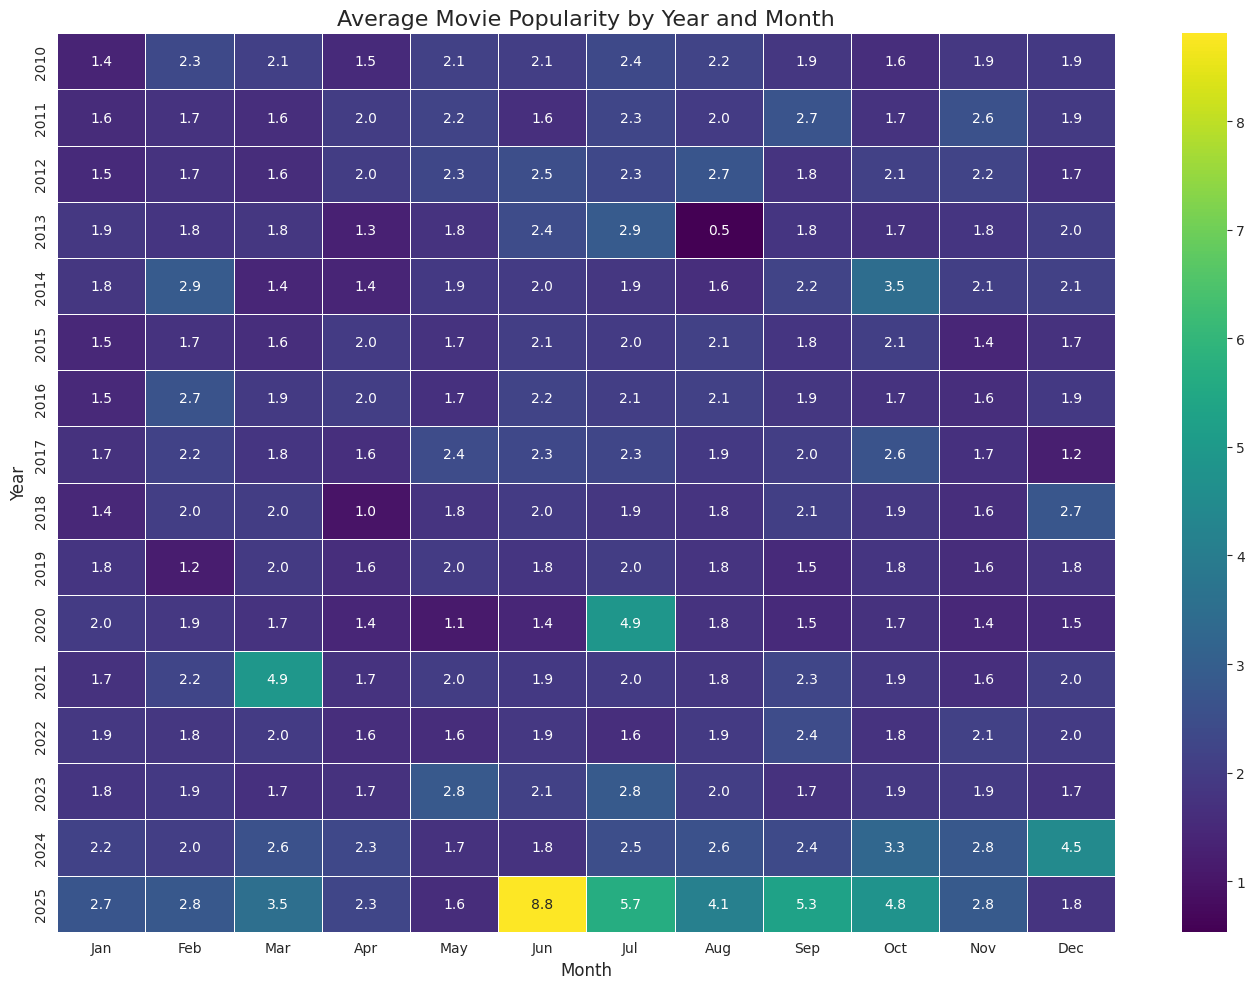

Year-Quarter heatmap saved to /kaggle/working/movie_popularity_year_quarter_heatmap.png


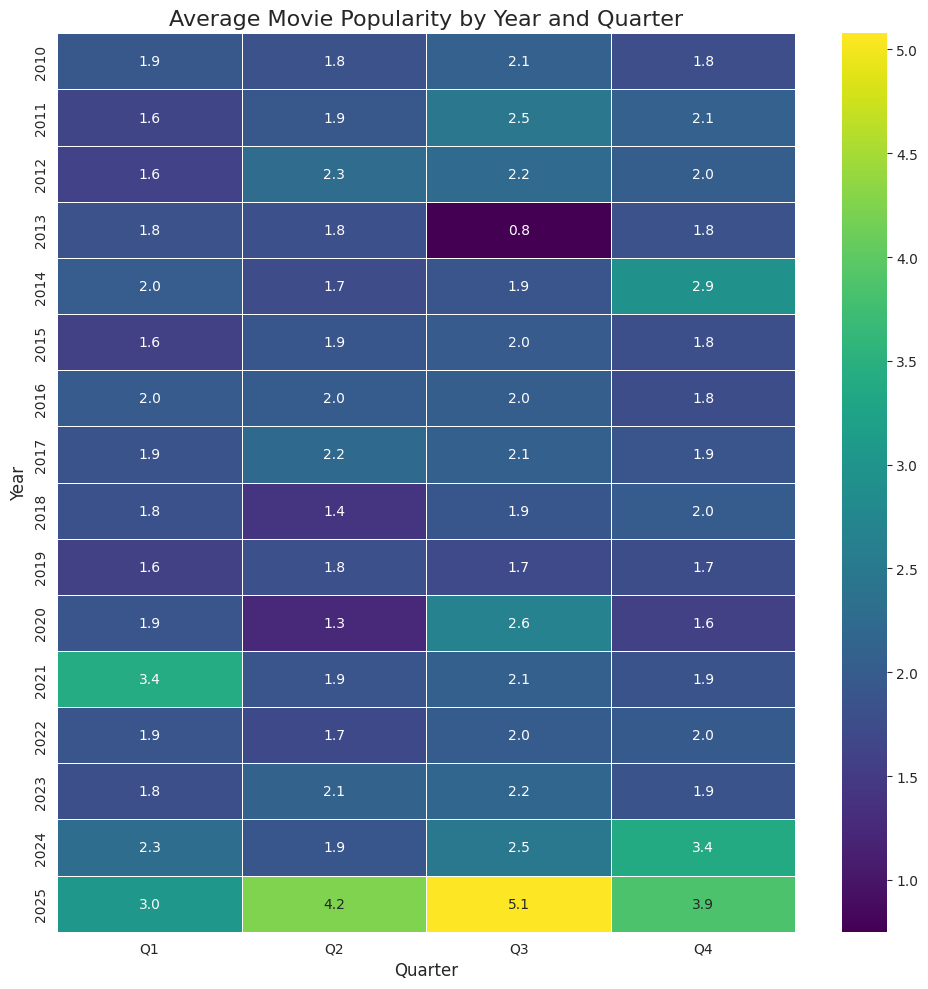

Yearly heatmap saved to /kaggle/working/movie_popularity_year_heatmap.png


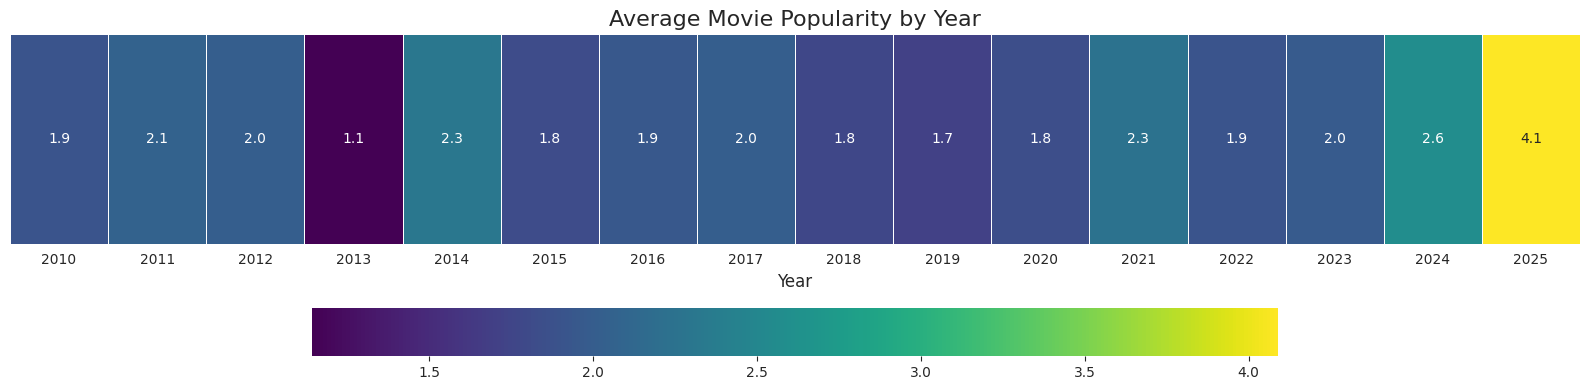

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# (한글 주석)
# matplotlib에서 x축의 정수 로케이터를 사용하기 위해 import합니다.
from matplotlib.ticker import MaxNLocator

def generate_movie_popularity_heatmaps(input_path, output_dir):
    """
    (한글 주석)
    영화 데이터를 불러와 'release_date'를 기준으로
    전체 영화의 월별, 분기별, 연도별 평균 인기도를 계산하고,
    이를 히트맵 차트로 저장 및 표시합니다.

    Args:
        input_path (str): 입력 CSV 파일 경로
        output_dir (str): 출력 차트 저장 디렉토리
    """
    
    # --- 1. 데이터 불러오기 ---
    try:
        df = pd.read_csv(input_path)
    except FileNotFoundError:
        print(f"Error: Input file not found at {input_path}")
        return
    except Exception as e:
        print(f"Error loading CSV: {e}")
        return

    # --- 2. 데이터 전처리 ---
    required_cols = ['release_date', 'popularity']
    if not all(col in df.columns for col in required_cols):
        print(f"Error: Missing one or more required columns: {required_cols}")
        print("Available columns are:", df.columns.tolist())
        return

    df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
    df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')
    df.dropna(subset=required_cols, inplace=True)

    # --- 3. 피처 엔지니어링 ---
    df['month'] = df['release_date'].dt.month
    df['quarter'] = df['release_date'].dt.quarter
    df['year'] = df['release_date'].dt.year

    # (한글 주석) x축 레이블용
    month_map_abbr = {
        1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
        7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
    }
    quarter_map = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}

    # --- 4. 월별 인기도 히트맵 (Year x Month) ---
    try:
        # (한글 주석) 연도와 월별로 평균 인기도 계산
        year_month_pop = df.groupby(['year', 'month'])['popularity'].mean().reset_index()
        
        # (한글 주석) 피벗 테이블 생성 (Heatmap용)
        # index='year', columns='month', values='popularity'
        year_month_pivot = year_month_pop.pivot_table(
            index='year', 
            columns='month', 
            values='popularity'
        )
        
        # (한글 주석) 월(1~12) 순서대로 정렬
        year_month_pivot = year_month_pivot.reindex(columns=range(1, 13))
        # (한글 주석) x축 레이블을 월 약어로 변경
        year_month_pivot.columns = year_month_pivot.columns.map(month_map_abbr)
        
        plt.figure(figsize=(14, 10))
        sns.heatmap(
            year_month_pivot, 
            annot=True,     # (한글 주석) 셀에 값 표시
            fmt=".1f",      # (한글 주석) 소수점 첫째 자리까지
            cmap="viridis", # (한글 주석) 컬러맵
            linewidths=.5
        )
        
        plt.title('Average Movie Popularity by Year and Month', fontsize=16)
        plt.xlabel('Month', fontsize=12)
        plt.ylabel('Year', fontsize=12)
        plt.tight_layout()
        
        # 차트 저장
        output_path = os.path.join(output_dir, 'movie_popularity_year_month_heatmap.png')
        plt.savefig(output_path)
        print(f"Year-Month heatmap saved to {output_path}")
        
        # 차트 표시
        plt.show()
        plt.close()

    except Exception as e:
        print(f"Error generating Year-Month heatmap: {e}")

    # --- 5. 분기별 인기도 히트맵 (Year x Quarter) ---
    try:
        # (한글 주석) 연도와 분기별로 평균 인기도 계산
        year_quarter_pop = df.groupby(['year', 'quarter'])['popularity'].mean().reset_index()
        
        # (한글 주석) 피벗 테이블 생성
        year_quarter_pivot = year_quarter_pop.pivot_table(
            index='year', 
            columns='quarter', 
            values='popularity'
        )
        
        # (한글 주석) 분기(1~4) 순서대로 정렬
        year_quarter_pivot = year_quarter_pivot.reindex(columns=range(1, 5))
        # (한글 주석) x축 레이블을 Q1, Q2 등으로 변경
        year_quarter_pivot.columns = year_quarter_pivot.columns.map(quarter_map)
        
        plt.figure(figsize=(10, 10))
        sns.heatmap(
            year_quarter_pivot, 
            annot=True, 
            fmt=".1f", 
            cmap="viridis",
            linewidths=.5
        )
        
        plt.title('Average Movie Popularity by Year and Quarter', fontsize=16)
        plt.xlabel('Quarter', fontsize=12)
        plt.ylabel('Year', fontsize=12)
        plt.tight_layout()
        
        # 차트 저장
        output_path = os.path.join(output_dir, 'movie_popularity_year_quarter_heatmap.png')
        plt.savefig(output_path)
        print(f"Year-Quarter heatmap saved to {output_path}")
        
        # 차트 표시
        plt.show()
        plt.close()

    except Exception as e:
        print(f"Error generating Year-Quarter heatmap: {e}")

    # --- 6. 연도별 인기도 히트맵 (단순 1D - Bar 차트가 더 적합하나, 히트맵으로 구현) ---
    # (한글 주석) 연도별 데이터는 1차원이라 히트맵보다는 바 차트가 낫지만, 요청에 따라 1xN 히트맵으로 생성합니다.
    try:
        yearly_pop = df.groupby('year')['popularity'].mean().reset_index()
        
        # (한글 주석) 히트맵용 데이터로 변환 (1 x N 형태)
        yearly_pivot = yearly_pop.set_index('year').T
        
        plt.figure(figsize=(16, 4))
        sns.heatmap(
            yearly_pivot, 
            annot=True, 
            fmt=".1f", 
            cmap="viridis",
            linewidths=.5,
            cbar_kws={'orientation': 'horizontal', 'pad': 0.2} # (한글 주석) 컬러바 수평으로
        )
        
        plt.title('Average Movie Popularity by Year', fontsize=16)
        plt.xlabel('Year', fontsize=12)
        plt.yticks([]) # (한글 주석) y축 레이블 제거
        plt.tight_layout()
        
        # 차트 저장
        output_path = os.path.join(output_dir, 'movie_popularity_year_heatmap.png')
        plt.savefig(output_path)
        print(f"Yearly heatmap saved to {output_path}")
        
        # 차트 표시
        plt.show()
        plt.close()

    except Exception as e:
        print(f"Error generating Yearly heatmap: {e}")


if __name__ == "__main__":
    # 파일 경로 정의
    INPUT_FILE = "/kaggle/working/final_processed_tmdb_data_exploded.csv"
    OUTPUT_DIR = "/kaggle/working/"
    
    # 출력 디렉토리가 없으면 생성
    if not os.path.exists(OUTPUT_DIR):
        os.makedirs(OUTPUT_DIR)
        
    generate_movie_popularity_heatmaps(INPUT_FILE, OUTPUT_DIR)

### 5-2. 영화 '장르'의 히트맵

Genre-Month heatmap saved to /kaggle/working/genre_popularity_month_heatmap.png


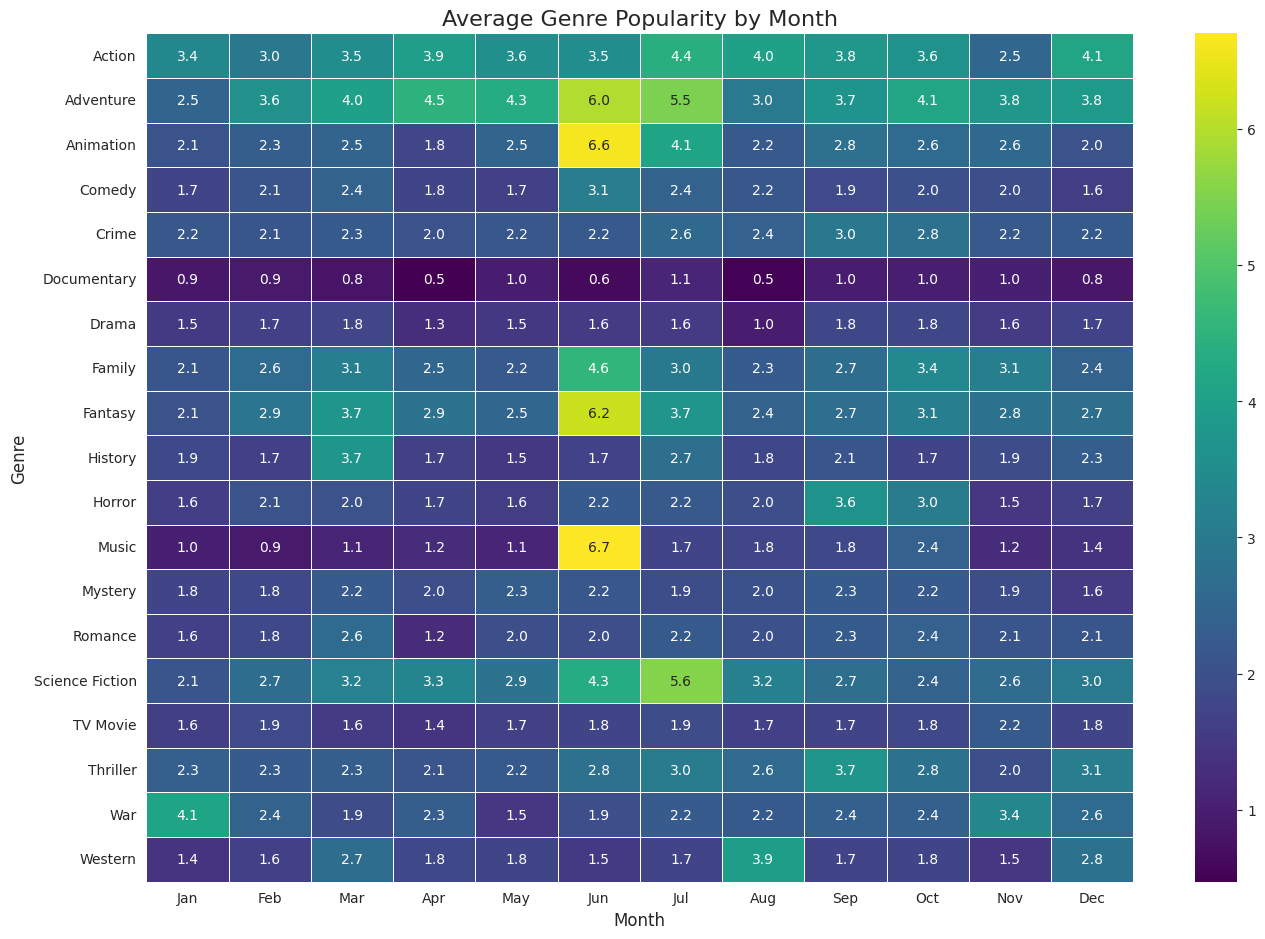

Genre-Quarter heatmap saved to /kaggle/working/genre_popularity_quarter_heatmap.png


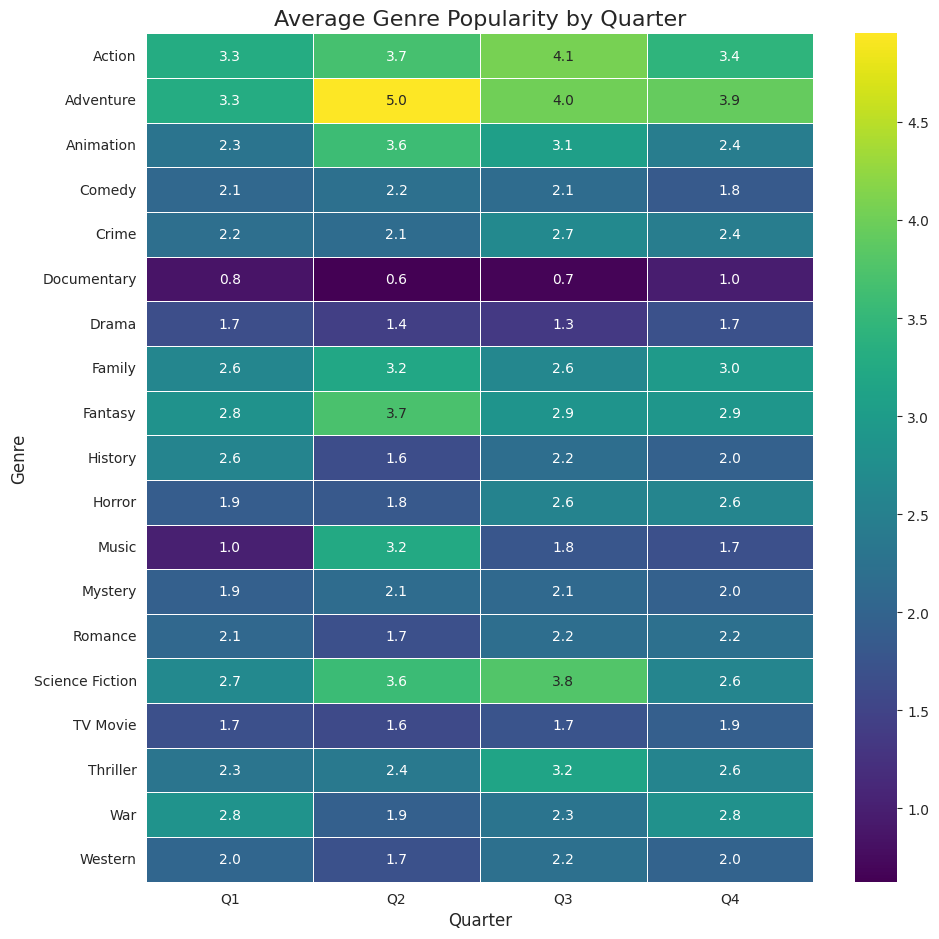

Genre-Year heatmap saved to /kaggle/working/genre_popularity_year_heatmap.png


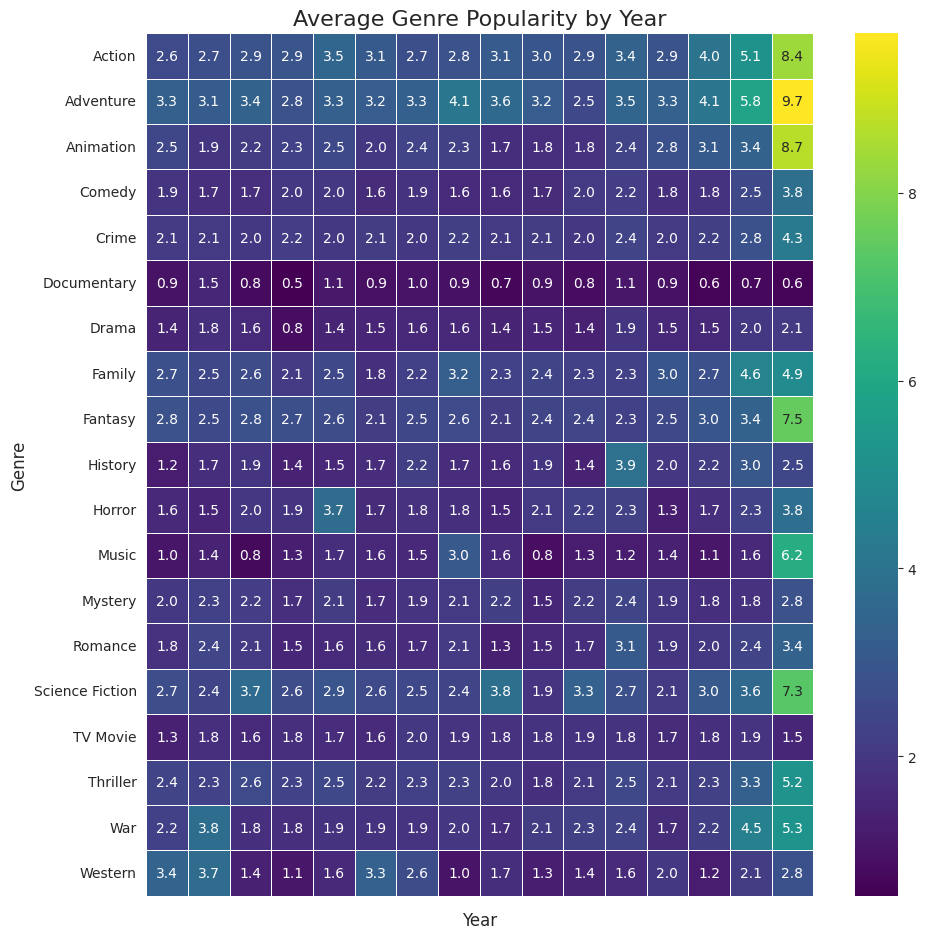

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# (한글 주석)
# matplotlib에서 x축의 정수 로케이터를 사용하기 위해 import합니다.
from matplotlib.ticker import MaxNLocator

def generate_genre_popularity_heatmaps(input_path, output_dir):
    """
    (한글 주석)
    영화 데이터를 불러와 'release_date'와 'genres'를 기준으로
    장르별 월별, 분기별, 연도별 평균 인기도를 계산하고,
    이를 히트맵 차트로 저장 및 표시합니다.

    Args:
        input_path (str): 입력 CSV 파일 경로
        output_dir (str): 출력 차트 저장 디렉토리
    """
    
    # --- 1. 데이터 불러오기 ---
    try:
        df = pd.read_csv(input_path)
    except FileNotFoundError:
        print(f"Error: Input file not found at {input_path}")
        return
    except Exception as e:
        print(f"Error loading CSV: {e}")
        return

    # --- 2. 데이터 전처리 ---
    required_cols = ['release_date', 'popularity', 'genres']
    if not all(col in df.columns for col in required_cols):
        print(f"Error: Missing one or more required columns: {required_cols}")
        print("Available columns are:", df.columns.tolist())
        return

    df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
    df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')
    df.dropna(subset=required_cols, inplace=True)
    
    # (한글 주석) 장르가 너무 많은 경우 상위 N개만 선택할 수 있습니다 (현재는 모두 사용)
    # top_genres = df['genres'].value_counts().nlargest(15).index
    # df = df[df['genres'].isin(top_genres)]

    # --- 3. 피처 엔지니어링 ---
    df['month'] = df['release_date'].dt.month
    df['quarter'] = df['release_date'].dt.quarter
    df['year'] = df['release_date'].dt.year

    # (한글 주석) x축 레이블용
    month_map_abbr = {
        1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
        7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
    }
    quarter_map = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}

    # --- 4. 월별 장르 인기도 히트맵 (Genre x Month) ---
    try:
        # (한글 주석) 장르와 월별로 평균 인기도 계산
        genre_month_pop = df.groupby(['genres', 'month'])['popularity'].mean().reset_index()
        
        # (한글 주석) 피벗 테이블 생성
        # index='genres', columns='month', values='popularity'
        genre_month_pivot = genre_month_pop.pivot_table(
            index='genres', 
            columns='month', 
            values='popularity'
        )
        
        # (한글 주석) 월(1~12) 순서대로 정렬
        genre_month_pivot = genre_month_pivot.reindex(columns=range(1, 13))
        # (한글 주석) x축 레이블을 월 약어로 변경
        genre_month_pivot.columns = genre_month_pivot.columns.map(month_map_abbr)
        
        # (한글 주석) 장르 수에 따라 히트맵 높이 조절
        num_genres = len(genre_month_pivot.index)
        plt.figure(figsize=(14, max(8, num_genres * 0.5)))
        
        sns.heatmap(
            genre_month_pivot, 
            annot=True,     # (한글 주석) 셀에 값 표시
            fmt=".1f",      # (한글 주석) 소수점 첫째 자리까지
            cmap="viridis", # (한글 주석) 컬러맵
            linewidths=.5
        )
        
        plt.title('Average Genre Popularity by Month', fontsize=16)
        plt.xlabel('Month', fontsize=12)
        plt.ylabel('Genre', fontsize=12)
        plt.tight_layout()
        
        # 차트 저장
        output_path = os.path.join(output_dir, 'genre_popularity_month_heatmap.png')
        plt.savefig(output_path)
        print(f"Genre-Month heatmap saved to {output_path}")
        
        # 차트 표시
        plt.show()
        plt.close()

    except Exception as e:
        print(f"Error generating Genre-Month heatmap: {e}")

    # --- 5. 분기별 장르 인기도 히트맵 (Genre x Quarter) ---
    try:
        # (한글 주석) 장르와 분기별로 평균 인기도 계산
        genre_quarter_pop = df.groupby(['genres', 'quarter'])['popularity'].mean().reset_index()
        
        # (한글 주석) 피벗 테이블 생성
        genre_quarter_pivot = genre_quarter_pop.pivot_table(
            index='genres', 
            columns='quarter', 
            values='popularity'
        )
        
        # (한글 주석) 분기(1~4) 순서대로 정렬
        genre_quarter_pivot = genre_quarter_pivot.reindex(columns=range(1, 5))
        # (한글 주석) x축 레이블을 Q1, Q2 등으로 변경
        genre_quarter_pivot.columns = genre_quarter_pivot.columns.map(quarter_map)
        
        # (한글 주석) 장르 수에 따라 히트맵 높이 조절
        num_genres = len(genre_quarter_pivot.index)
        plt.figure(figsize=(10, max(8, num_genres * 0.5)))
        
        sns.heatmap(
            genre_quarter_pivot, 
            annot=True, 
            fmt=".1f", 
            cmap="viridis",
            linewidths=.5
        )
        
        plt.title('Average Genre Popularity by Quarter', fontsize=16)
        plt.xlabel('Quarter', fontsize=12)
        plt.ylabel('Genre', fontsize=12)
        plt.tight_layout()
        
        # 차트 저장
        output_path = os.path.join(output_dir, 'genre_popularity_quarter_heatmap.png')
        plt.savefig(output_path)
        print(f"Genre-Quarter heatmap saved to {output_path}")
        
        # 차트 표시
        plt.show()
        plt.close()

    except Exception as e:
        print(f"Error generating Genre-Quarter heatmap: {e}")

    # --- 6. 연도별 장르 인기도 히트맵 (Genre x Year) ---
    try:
        # (한글 주석) 장르와 연도별로 평균 인기도 계산
        genre_year_pop = df.groupby(['genres', 'year'])['popularity'].mean().reset_index()
        
        # (한글 주석) 피벗 테이블 생성
        genre_year_pivot = genre_year_pop.pivot_table(
            index='genres', 
            columns='year', 
            values='popularity'
        )
        
        # (한글 주석) 연도가 너무 많으면 그래프가 길어질 수 있음
        num_genres = len(genre_year_pivot.index)
        num_years = len(genre_year_pivot.columns)
        plt.figure(figsize=(max(10, num_years * 0.6), max(8, num_genres * 0.5)))
        
        sns.heatmap(
            genre_year_pivot, 
            annot=True, 
            fmt=".1f", 
            cmap="viridis",
            linewidths=.5
        )
        
        # (한글 주석) x축 레이블을 정수로 표시
        ax = plt.gca()
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))

        plt.title('Average Genre Popularity by Year', fontsize=16)
        plt.xlabel('Year', fontsize=12)
        plt.ylabel('Genre', fontsize=12)
        plt.xticks(rotation=45)
        plt.tight_layout()
        
        # 차트 저장
        output_path = os.path.join(output_dir, 'genre_popularity_year_heatmap.png')
        plt.savefig(output_path)
        print(f"Genre-Year heatmap saved to {output_path}")
        
        # 차트 표시
        plt.show()
        plt.close()

    except Exception as e:
        print(f"Error generating Genre-Year heatmap: {e}")


if __name__ == "__main__":
    # 파일 경로 정의
    INPUT_FILE = "/kaggle/working/final_processed_tmdb_data_exploded.csv"
    OUTPUT_DIR = "/kaggle/working/"
    
    # 출력 디렉토리가 없으면 생성
    if not os.path.exists(OUTPUT_DIR):
        os.makedirs(OUTPUT_DIR)
        
    generate_genre_popularity_heatmaps(INPUT_FILE, OUTPUT_DIR)

## 6. 장르들을 시기별로 인기도 분석

In [7]:
import pandas as pd
import os

def analyze_genre_seasonality(input_path, output_dir): # (한글 주석) output_dir 인자 추가
    """
    (한글 주석)
    영화 데이터를 불러와 'genres'별 월별, 분기별 평균 인기도를 계산하고,
    각 장르의 전체 평균 인기도와 비교하여 통계적 인사이트를 텍스트 파일로 저장합니다.

    Args:
        input_path (str): 입력 CSV 파일 경로
        output_dir (str): 출력 텍스트 파일 저장 디렉토리
    """
    
    # --- 1. 데이터 불러오기 ---
    try:
        df = pd.read_csv(input_path)
    except FileNotFoundError:
        print(f"Error: Input file not found at {input_path}")
        return
    except Exception as e:
        print(f"Error loading CSV: {e}")
        return

    # --- 2. 데이터 전처리 ---
    required_cols = ['release_date', 'popularity', 'genres']
    if not all(col in df.columns for col in required_cols):
        print(f"Error: Missing one or more required columns: {required_cols}")
        return

    df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
    df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')
    df.dropna(subset=required_cols, inplace=True)

    # --- 3. 피처 엔지니어링 ---
    df['month'] = df['release_date'].dt.month
    df['quarter'] = df['release_date'].dt.quarter

    # (한글 주석) 월/분기 이름을 텍스트로 매핑 (분석 결과 출력용)
    month_map = {
        1: '1월', 2: '2월', 3: '3월', 4: '4월', 5: '5월', 6: '6월',
        7: '7월', 8: '8월', 9: '9월', 10: '10월', 11: '11월', 12: '12월'
    }
    quarter_map = {1: '1분기', 2: '2분기', 3: '3분기', 4: '4분기'}

    # --- 4. 통계 분석 및 파일 저장 ---
    
    # (한글 주석) 1. 장르별 전체 평균 인기도 계산
    overall_genre_pop = df.groupby('genres')['popularity'].mean()
    
    # (한글 주석) 2. 장르 및 월별 평균 인기도 계산
    monthly_genre_pop = df.groupby(['genres', 'month'])['popularity'].mean()
    
    # (한글 주석) 3. 장르 및 분기별 평균 인기도 계산
    quarterly_genre_pop = df.groupby(['genres', 'quarter'])['popularity'].mean()
    
    # (한글 주석) 4. 분석 결과를 텍스트 파일로 저장
    output_filepath = os.path.join(output_dir, "genre_popularity_analysis.txt")
    
    try:
        with open(output_filepath, 'w', encoding='utf-8') as f:
            f.write("=" * 50 + "\n")
            f.write(" 장르별 시기 인기도 분석 (By Popularity)\n")
            f.write("=" * 50 + "\n")

            # (한글 주석) 5. 장르별로 반복하며 분석 결과 파일에 쓰기
            for genre in overall_genre_pop.index:
                overall_avg = overall_genre_pop[genre]
                
                f.write(f"\n--- [ {genre} ] 장르 분석 (전체 평균 인기도: {overall_avg:.2f}) ---\n")
                
                # --- 월별 분석 ---
                f.write("  [월별 분석]\n")
                significant_months = []
                try:
                    for month_num in range(1, 13):
                        # (한글 주석) 특정 장르의 특정 월 데이터가 없을 수도 있으므로 try-except 사용
                        try:
                            month_avg = monthly_genre_pop.loc[(genre, month_num)]
                        except KeyError:
                            continue # (한글 주석) 해당 월에 데이터가 없으면 건너뛰기

                        # (한글 주석) 전체 평균 대비 월별 인기도 증감률 계산
                        pct_diff = (month_avg - overall_avg) / overall_avg * 100
                        
                        # (한글 주석) 평균보다 25% 이상 인기도가 높으면 '주목!'
                        if pct_diff > 25:
                            significant_months.append(
                                f"    -> {month_map[month_num]}: {month_avg:.2f} (평균보다 +{pct_diff:.1f}%) [주목!]"
                            )
                        # (한글 주석) 평균보다 25% 이상 인기도가 낮으면 '부진'
                        elif pct_diff < -25:
                             significant_months.append(
                                f"    -> {month_map[month_num]}: {month_avg:.2f} (평균보다 {pct_diff:.1f}%) [부진]"
                            )
                    
                    if significant_months:
                        for line in significant_months:
                            f.write(line + "\n")
                    else:
                        f.write("    -> 모든 월의 인기도가 평균 대비 +/- 25% 이내로 안정적입니다.\n")

                except Exception as e:
                    f.write(f"    -> 월별 분석 중 오류 발생: {e}\n")

                # --- 분기별 분석 ---
                f.write("\n  [분기별 분석]\n")
                try:
                    for quarter_num in range(1, 5):
                        try:
                            quarter_avg = quarterly_genre_pop.loc[(genre, quarter_num)]
                        except KeyError:
                            continue

                        pct_diff = (quarter_avg - overall_avg) / overall_avg * 100
                        
                        sign = "+" if pct_diff > 0 else ""
                        f.write(f"    -> {quarter_map[quarter_num]}: {quarter_avg:.2f} (평균 대비 {sign}{pct_diff:.1f}%)\n")
                
                except Exception as e:
                    f.write(f"    -> 분기별 분석 중 오류 발생: {e}\n")

        # (한글 주석) 파일 저장 완료 알림
        print(f"분석 결과가 {output_filepath} 파일로 저장되었습니다.")

    except IOError as e:
        print(f"Error: 파일 쓰기 중 오류 발생 {output_filepath}. {e}")
    except Exception as e:
        print(f"Error: 분석 중 알 수 없는 오류 발생: {e}")


if __name__ == "__main__":
    INPUT_FILE = "/kaggle/working/final_processed_tmdb_data_exploded.csv"
    OUTPUT_DIR = "/kaggle/working/" # (한글 주석) 출력 디렉토리 정의
    
    # (한글 주석) 출력 디렉토리가 없으면 생성
    if not os.path.exists(OUTPUT_DIR):
        os.makedirs(OUTPUT_DIR)

    # (한글 주석) 분석 함수 실행 (output_dir 전달)
    analyze_genre_seasonality(INPUT_FILE, OUTPUT_DIR)

분석 결과가 /kaggle/working/genre_popularity_analysis.txt 파일로 저장되었습니다.


==================================================
 장르별 시기 인기도 분석 (By Popularity)
==================================================

--- [ Action ] 장르 분석 (전체 평균 인기도: 3.62) ---
  [월별 분석]
    -> 11월: 2.53 (평균보다 -30.2%) [부진]

  [분기별 분석]
    -> 1분기: 3.29 (평균 대비 -9.2%)
    -> 2분기: 3.67 (평균 대비 +1.4%)
    -> 3분기: 4.07 (평균 대비 +12.4%)
    -> 4분기: 3.45 (평균 대비 -4.9%)

--- [ Adventure ] 장르 분석 (전체 평균 인기도: 4.01) ---
  [월별 분석]
    -> 1월: 2.47 (평균보다 -38.4%) [부진]
    -> 6월: 5.96 (평균보다 +48.7%) [주목!]
    -> 7월: 5.48 (평균보다 +36.7%) [주목!]

  [분기별 분석]
    -> 1분기: 3.29 (평균 대비 -17.8%)
    -> 2분기: 4.95 (평균 대비 +23.5%)
    -> 3분기: 4.01 (평균 대비 +0.2%)
    -> 4분기: 3.94 (평균 대비 -1.8%)

--- [ Animation ] 장르 분석 (전체 평균 인기도: 2.80) ---
  [월별 분석]
    -> 1월: 2.07 (평균보다 -26.2%) [부진]
    -> 4월: 1.79 (평균보다 -36.3%) [부진]
    -> 6월: 6.62 (평균보다 +136.3%) [주목!]
    -> 7월: 4.10 (평균보다 +46.4%) [주목!]
    -> 12월: 2.05 (평균보다 -26.9%) [부진]

  [분기별 분석]
    -> 1분기: 2.29 (평균 대비 -18.3%)
    -> 2분기: 3.59 (평균 대비 +28.0%)
    -> 3분기: 3.05 (평균 대비 +9.0%)
    -> 4분기: 2.44 (평균 대비 -13.1%)

--- [ Comedy ] 장르 분석 (전체 평균 인기도: 2.05) ---
  [월별 분석]
    -> 6월: 3.10 (평균보다 +51.4%) [주목!]

  [분기별 분석]
    -> 1분기: 2.08 (평균 대비 +1.4%)
    -> 2분기: 2.20 (평균 대비 +7.7%)
    -> 3분기: 2.14 (평균 대비 +4.5%)
    -> 4분기: 1.84 (평균 대비 -10.0%)

--- [ Crime ] 장르 분석 (전체 평균 인기도: 2.36) ---
  [월별 분석]
    -> 9월: 2.96 (평균보다 +25.4%) [주목!]

  [분기별 분석]
    -> 1분기: 2.19 (평균 대비 -7.5%)
    -> 2분기: 2.13 (평균 대비 -9.8%)
    -> 3분기: 2.66 (평균 대비 +12.4%)
    -> 4분기: 2.44 (평균 대비 +3.2%)

--- [ Documentary ] 장르 분석 (전체 평균 인기도: 0.75) ---
  [월별 분석]
    -> 4월: 0.47 (평균보다 -36.7%) [부진]
    -> 5월: 0.96 (평균보다 +28.1%) [주목!]
    -> 7월: 1.12 (평균보다 +49.6%) [주목!]
    -> 8월: 0.52 (평균보다 -30.6%) [부진]
    -> 9월: 0.98 (평균보다 +31.0%) [주목!]
    -> 10월: 0.99 (평균보다 +32.7%) [주목!]
    -> 11월: 1.02 (평균보다 +36.4%) [주목!]

  [분기별 분석]
    -> 1분기: 0.85 (평균 대비 +13.7%)
    -> 2분기: 0.63 (평균 대비 -16.2%)
    -> 3분기: 0.67 (평균 대비 -11.0%)
    -> 4분기: 0.97 (평균 대비 +30.0%)

--- [ Drama ] 장르 분석 (전체 평균 인기도: 1.52) ---
  [월별 분석]
    -> 8월: 0.96 (평균보다 -37.0%) [부진]

  [분기별 분석]
    -> 1분기: 1.65 (평균 대비 +8.9%)
    -> 2분기: 1.43 (평균 대비 -5.7%)
    -> 3분기: 1.34 (평균 대비 -11.6%)
    -> 4분기: 1.70 (평균 대비 +11.7%)

--- [ Family ] 장르 분석 (전체 평균 인기도: 2.85) ---
  [월별 분석]
    -> 1월: 2.13 (평균보다 -25.2%) [부진]
    -> 6월: 4.55 (평균보다 +59.6%) [주목!]

  [분기별 분석]
    -> 1분기: 2.62 (평균 대비 -8.3%)
    -> 2분기: 3.20 (평균 대비 +12.2%)
    -> 3분기: 2.64 (평균 대비 -7.6%)
    -> 4분기: 2.96 (평균 대비 +3.8%)

--- [ Fantasy ] 장르 분석 (전체 평균 인기도: 3.07) ---
  [월별 분석]
    -> 1월: 2.05 (평균보다 -33.0%) [부진]
    -> 6월: 6.19 (평균보다 +102.1%) [주목!]

  [분기별 분석]
    -> 1분기: 2.84 (평균 대비 -7.5%)
    -> 2분기: 3.70 (평균 대비 +20.8%)
    -> 3분기: 2.86 (평균 대비 -6.8%)
    -> 4분기: 2.89 (평균 대비 -5.6%)

--- [ History ] 장르 분석 (전체 평균 인기도: 2.12) ---
  [월별 분석]
    -> 3월: 3.74 (평균보다 +75.8%) [주목!]
    -> 5월: 1.49 (평균보다 -29.8%) [부진]
    -> 7월: 2.71 (평균보다 +27.6%) [주목!]

  [분기별 분석]
    -> 1분기: 2.58 (평균 대비 +21.4%)
    -> 2분기: 1.63 (평균 대비 -23.3%)
    -> 3분기: 2.17 (평균 대비 +2.1%)
    -> 4분기: 1.95 (평균 대비 -8.0%)

--- [ Horror ] 장르 분석 (전체 평균 인기도: 2.29) ---
  [월별 분석]
    -> 1월: 1.59 (평균보다 -30.6%) [부진]
    -> 5월: 1.58 (평균보다 -31.1%) [부진]
    -> 9월: 3.61 (평균보다 +57.5%) [주목!]
    -> 10월: 3.04 (평균보다 +32.4%) [주목!]
    -> 11월: 1.47 (평균보다 -35.9%) [부진]
    -> 12월: 1.68 (평균보다 -26.8%) [부진]

  [분기별 분석]
    -> 1분기: 1.89 (평균 대비 -17.6%)
    -> 2분기: 1.81 (평균 대비 -20.9%)
    -> 3분기: 2.55 (평균 대비 +11.4%)
    -> 4분기: 2.59 (평균 대비 +12.9%)

--- [ Music ] 장르 분석 (전체 평균 인기도: 1.87) ---
  [월별 분석]
    -> 1월: 1.03 (평균보다 -44.9%) [부진]
    -> 2월: 0.90 (평균보다 -52.1%) [부진]
    -> 3월: 1.10 (평균보다 -41.0%) [부진]
    -> 4월: 1.23 (평균보다 -33.9%) [부진]
    -> 5월: 1.11 (평균보다 -40.7%) [부진]
    -> 6월: 6.70 (평균보다 +258.6%) [주목!]
    -> 10월: 2.38 (평균보다 +27.4%) [주목!]
    -> 11월: 1.25 (평균보다 -33.2%) [부진]
    -> 12월: 1.39 (평균보다 -25.4%) [부진]

  [분기별 분석]
    -> 1분기: 1.01 (평균 대비 -46.2%)
    -> 2분기: 3.24 (평균 대비 +73.3%)
    -> 3분기: 1.78 (평균 대비 -4.9%)
    -> 4분기: 1.69 (평균 대비 -9.6%)

--- [ Mystery ] 장르 분석 (전체 평균 인기도: 2.03) ---
  [월별 분석]
    -> 모든 월의 인기도가 평균 대비 +/- 25% 이내로 안정적입니다.

  [분기별 분석]
    -> 1분기: 1.94 (평균 대비 -4.3%)
    -> 2분기: 2.14 (평균 대비 +5.5%)
    -> 3분기: 2.09 (평균 대비 +3.3%)
    -> 4분기: 1.95 (평균 대비 -3.6%)

--- [ Romance ] 장르 분석 (전체 평균 인기도: 2.03) ---
  [월별 분석]
    -> 3월: 2.62 (평균보다 +28.8%) [주목!]
    -> 4월: 1.24 (평균보다 -39.3%) [부진]

  [분기별 분석]
    -> 1분기: 2.07 (평균 대비 +1.5%)
    -> 2분기: 1.68 (평균 대비 -17.6%)
    -> 3분기: 2.17 (평균 대비 +6.8%)
    -> 4분기: 2.20 (평균 대비 +8.4%)

--- [ Science Fiction ] 장르 분석 (전체 평균 인기도: 3.14) ---
  [월별 분석]
    -> 1월: 2.12 (평균보다 -32.5%) [부진]
    -> 6월: 4.30 (평균보다 +37.3%) [주목!]
    -> 7월: 5.55 (평균보다 +77.1%) [주목!]

  [분기별 분석]
    -> 1분기: 2.67 (평균 대비 -15.0%)
    -> 2분기: 3.57 (평균 대비 +14.0%)
    -> 3분기: 3.78 (평균 대비 +20.7%)
    -> 4분기: 2.60 (평균 대비 -17.0%)

--- [ TV Movie ] 장르 분석 (전체 평균 인기도: 1.77) ---
  [월별 분석]
    -> 모든 월의 인기도가 평균 대비 +/- 25% 이내로 안정적입니다.

  [분기별 분석]
    -> 1분기: 1.68 (평균 대비 -4.9%)
    -> 2분기: 1.60 (평균 대비 -9.7%)
    -> 3분기: 1.75 (평균 대비 -1.1%)
    -> 4분기: 1.92 (평균 대비 +8.6%)

--- [ Thriller ] 장르 분석 (전체 평균 인기도: 2.63) ---
  [월별 분석]
    -> 9월: 3.73 (평균보다 +41.7%) [주목!]
    -> 11월: 1.97 (평균보다 -25.1%) [부진]

  [분기별 분석]
    -> 1분기: 2.30 (평균 대비 -12.6%)
    -> 2분기: 2.37 (평균 대비 -10.0%)
    -> 3분기: 3.15 (평균 대비 +19.8%)
    -> 4분기: 2.58 (평균 대비 -2.0%)

--- [ War ] 장르 분석 (전체 평균 인기도: 2.50) ---
  [월별 분석]
    -> 1월: 4.12 (평균보다 +64.4%) [주목!]
    -> 5월: 1.47 (평균보다 -41.4%) [부진]
    -> 11월: 3.36 (평균보다 +34.2%) [주목!]

  [분기별 분석]
    -> 1분기: 2.84 (평균 대비 +13.4%)
    -> 2분기: 1.94 (평균 대비 -22.7%)
    -> 3분기: 2.29 (평균 대비 -8.4%)
    -> 4분기: 2.79 (평균 대비 +11.5%)

--- [ Western ] 장르 분석 (전체 평균 인기도: 1.99) ---
  [월별 분석]
    -> 1월: 1.40 (평균보다 -29.7%) [부진]
    -> 3월: 2.68 (평균보다 +34.9%) [주목!]
    -> 8월: 3.92 (평균보다 +97.2%) [주목!]
    -> 11월: 1.46 (평균보다 -26.6%) [부진]
    -> 12월: 2.80 (평균보다 +40.5%) [주목!]

  [분기별 분석]
    -> 1분기: 2.04 (평균 대비 +2.8%)
    -> 2분기: 1.70 (평균 대비 -14.6%)
    -> 3분기: 2.21 (평균 대비 +11.0%)
    -> 4분기: 1.98 (평균 대비 -0.2%)


# 여기부터 시작/


## 4. 시계열 분해 

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import os
import warnings

# 경고 메시지 무시 설정 (시계열 분해 경고 메시지 방지)
warnings.filterwarnings('ignore')

# --- 설정 (Configuration) ---
# 이전 단계에서 저장된 Explode된 데이터 파일 경로
INPUT_FILE_PATH = '/kaggle/working/final_processed_tmdb_data_exploded.csv'
OUTPUT_DIR = '/kaggle/working/'

print("--- 장르별 인기도 시계열 분해 스크립트 시작 ---")
print(f"입력 파일: {INPUT_FILE_PATH}")

# Matplotlib 스타일 및 한글 폰트 설정
plt.style.use('seaborn-v0_8-whitegrid')
try:
    plt.rcParams['font.family'] = 'NanumGothic'
except Exception:
    plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 깨짐 방지

try:
    # 1. 데이터 로드 및 전처리
    df = pd.read_csv(INPUT_FILE_PATH)
    
    # 'Id' 컬럼을 'id'로 변경 (사용자 요청 반영)
    if 'Id' in df.columns:
        df.rename(columns={'Id': 'id'}, inplace=True)

    # 필수 컬럼 결측치 제거 및 타입 변환
    df = df.dropna(subset=['popularity', 'year', 'month', 'genres'])
    df['year'] = df['year'].astype(int)
    df['month'] = df['month'].astype(int)
    
    # 2. 날짜 인덱스 생성 (시계열 분석을 위해 YYYY-MM-01 형식의 월별 인덱스 생성)
    # pandas to_datetime을 사용하여 year와 month를 결합하고, day는 1로 설정
    df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))
    
    # 3. 분석 대상 장르 선정 (인기도 합계 기준 상위 5개)
    df_clean_genres = df[~df['genres'].isin(['', 'None', 'Unknown'])]
    top_genres = df_clean_genres.groupby('genres')['popularity'].sum().nlargest(5).index.tolist()
    df_top_genres = df_clean_genres[df_clean_genres['genres'].isin(top_genres)]
    
    print(f"\n분석 대상 장르 (인기도 상위 5개): {top_genres}")

    # 4. 월별 평균 인기도 시계열 데이터 생성
    # 시계열 인덱스는 날짜로 설정하고, 월별 평균 인기도를 집계
    monthly_popularity = df_top_genres.groupby(['date', 'genres'])['popularity'].mean().reset_index()
    
    # 시계열 분해를 위해 장르별로 데이터프레임을 분리하고 날짜를 인덱스로 설정
    ts_data = {
        genre: monthly_popularity[monthly_popularity['genres'] == genre]
                     .set_index('date')['popularity']
                     .sort_index()
        for genre in top_genres
    }

    # --------------------------------------------------------
    # --- 5. 시계열 분해 및 시각화 ---
    # --------------------------------------------------------

    print("\n✅ 시계열 분해 (월별 평균 인기도, 주기=12개월) 시작...")

    for genre, ts in ts_data.items():
        if len(ts) < 24: # 분해를 위한 최소 데이터 포인트 (주기 12개월 * 2 = 24)
            print(f"경고: {genre} 장르의 데이터 포인트가 너무 적어 (현재: {len(ts)}개), 분해가 불안정할 수 있습니다.")
            # 데이터가 부족하면 다음 장르로 넘어감
            continue

        try:
            # 시계열 분해 (가법 모델, 주기=12개월)
            # 가법 모델 (Additive Model)은 계절성 변동폭이 시간이 지나도 일정할 때 적합함
            decomposition = seasonal_decompose(ts, model='additive', period=12)

            # 시각화
            fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12), sharex=True)
            
            decomposition.observed.plot(ax=ax1, title=f'{genre} - Observed (관측치)', color='b')
            ax1.set_ylabel('월별 평균 인기도')
            
            decomposition.trend.plot(ax=ax2, title=f'{genre} - Trend (추세)', color='r')
            ax2.set_ylabel('추세값')
            
            decomposition.seasonal.plot(ax=ax3, title=f'{genre} - Seasonal (계절성)', color='g')
            ax3.set_ylabel('계절성값')
            
            decomposition.resid.plot(ax=ax4, title=f'{genre} - Residual (잔차)', color='purple')
            ax4.set_ylabel('잔차값')
            ax4.set_xlabel('날짜')

            plt.suptitle(f'장르별 월별 평균 인기도 시계열 분해: {genre}', fontsize=18, y=1.02)
            plt.tight_layout()
            plt.savefig(os.path.join(OUTPUT_DIR, f'timeseries_decomposition_{genre.replace(" ", "_")}.png'))
            plt.show()
            
        except Exception as e:
            print(f"❌ {genre} 장르 시계열 분해 중 오류 발생: {e}")

    print("\n✅ 시계열 분해 및 시각화 작업이 성공적으로 완료되었습니다.")

except FileNotFoundError:
    print(f"\n❌ 오류: 입력 파일({INPUT_FILE_PATH})을 찾을 수 없습니다. 이전 단계의 파일 경로를 확인해 주세요.")
except Exception as e:
    print(f"\n❌ 예기치 않은 오류가 발생했습니다: {e}")
    import traceback
    print(traceback.format_exc())

print("\n--- 스크립트 종료 ---")


--- 장르별 인기도 시계열 분해 스크립트 시작 ---
입력 파일: /kaggle/working/final_processed_tmdb_data_exploded.csv

❌ 예기치 않은 오류가 발생했습니다: ['year', 'month']
Traceback (most recent call last):
  File "/tmp/ipykernel_13/3640839604.py", line 36, in <cell line: 0>
    df = df.dropna(subset=['popularity', 'year', 'month', 'genres'])
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/core/frame.py", line 6670, in dropna
    raise KeyError(np.array(subset)[check].tolist())
KeyError: ['year', 'month']


--- 스크립트 종료 ---


## 5. 2025 예측

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
import os
import warnings

# 경고 메시지 무시 설정 (SARIMAX 수렴 경고 방지)
warnings.filterwarnings('ignore')

# --- 설정 (Configuration) ---
# 이전 단계에서 저장된 Explode된 데이터 파일 경로 (경로를 환경에 맞게 조정하세요)
INPUT_FILE_PATH = '/kaggle/working/final_processed_tmdb_data_exploded.csv'
OUTPUT_DIR = '/kaggle/working/'

# --- 실행 함수 ---
print("--- 장르별 인기도 2025년 예측 스크립트 시작 ---")

# Matplotlib 스타일 및 한글 폰트 설정
plt.style.use('seaborn-v0_8-whitegrid')
try:
    plt.rcParams['font.family'] = 'NanumGothic'
except Exception:
    plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.unicode_minus'] = False 

try:
    # 1. 데이터 로드 및 전처리
    df = pd.read_csv(INPUT_FILE_PATH)

    # 'Id' 컬럼을 'id'로 변경
    if 'Id' in df.columns:
        df.rename(columns={'Id': 'id'}, inplace=True)

    # 필수 컬럼 결측치 제거 및 타입 변환
    df = df.dropna(subset=['popularity', 'year', 'month', 'genres'])
    df['year'] = df['year'].astype(int)
    df['month'] = df['month'].astype(int)

    # 2. 날짜 인덱스 생성
    df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

    # 3. 분석 대상 장르 선정 (인기도 합계 기준 상위 5개)
    df_clean_genres = df[~df['genres'].isin(['', 'None', 'Unknown'])]
    top_genres = df_clean_genres.groupby('genres')['popularity'].sum().nlargest(5).index.tolist()
    df_top_genres = df_clean_genres[df_clean_genres['genres'].isin(top_genres)]

    print(f"\n분석 대상 장르 (상위 5개): {top_genres}")

    # 4. 월별 평균 인기도 시계열 데이터 생성
    monthly_popularity = df_top_genres.groupby(['date', 'genres'])['popularity'].mean().reset_index()

    ts_data = {
        genre: monthly_popularity[monthly_popularity['genres'] == genre]
                     .set_index('date')['popularity']
                     .sort_index()
        for genre in top_genres
    }

    # 5. 예측 및 시각화
    print("\n✅ SARIMAX 모델 예측 시작 (2025년 12월까지)...")

    # 예측 종료 날짜 설정 (2025년 12월 1일)
    forecast_end_date = pd.to_datetime('2025-12-01')

    # X축 범위 설정을 위한 시작일 지정
    plot_start_date = pd.to_datetime('2024-01-01') 
    
    for genre, ts in ts_data.items():
        if len(ts) < 24: 
            print(f"경고: {genre} 장르의 데이터 포인트가 너무 적어 ({len(ts)}개), 예측을 건너뜁니다.")
            continue

        last_date = ts.index.max()
        if last_date >= forecast_end_date:
            print(f"경고: {genre} 장르 데이터가 이미 2025년 12월 이후를 포함하여 예측을 건너뜁니다.")
            continue

        try:
            # 1. 모델 구축 및 훈련
            model = SARIMAX(ts, 
                            order=(1, 1, 1), 
                            seasonal_order=(1, 1, 1, 12),
                            enforce_stationarity=False,
                            enforce_invertibility=False)
            
            model_fit = model.fit(disp=False)
            
            # 2. 예측 스텝 수 계산 및 정수 인덱스 설정
            forecast_start_date = last_date + pd.DateOffset(months=1)
            steps_to_forecast = len(pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='MS'))
            
            # 정수 인덱스를 사용하여 예측 시작 (len(ts)) 부터 예측 끝까지 수행
            forecast_result = model_fit.get_prediction(start=len(ts), end=len(ts) + steps_to_forecast - 1)
            
            # 예측값 및 신뢰 구간 추출
            pred_mean = forecast_result.predicted_mean
            conf_int = forecast_result.conf_int()
            
            # 예측 인덱스 생성 및 재할당
            forecast_index = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='MS')
            pred_mean.index = forecast_index
            conf_int.index = forecast_index
            
            # 3. 시각화
            plt.figure(figsize=(14, 7))
            
            # 과거 데이터 (observed)
            ts.plot(label='Observed (과거 데이터)', color='blue')
            
            # 예측값 (forecast)
            pred_mean.plot(ax=plt.gca(), label='Forecast (예측치)', color='red', linestyle='--')
            
            # 신뢰 구간 (Confidence Interval)
            plt.fill_between(conf_int.index,
                             conf_int.iloc[:, 0],
                             conf_int.iloc[:, 1], color='red', alpha=0.1, label='95% Confidence Interval')
            
            # X축 범위 설정 (2024년~2025년 확대)
            plt.xlim(plot_start_date, pd.to_datetime('2025-12-31')) 
            
            plt.title(f'{genre} 장르 인기도 예측 (2024년~2025년)', fontsize=16)
            plt.xlabel('날짜', fontsize=12)
            plt.ylabel('월별 평균 인기도', fontsize=12)
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.savefig(os.path.join(OUTPUT_DIR, f'genre_forecast_2025_zoomed_{genre.replace(" ", "_")}.png'))
            plt.show()

        except Exception as e:
            print(f"❌ {genre} 장르 예측 중 오류 발생: {e}")
            import traceback
            print(traceback.format_exc())

    print("\n✅ 예측 및 시각화 작업이 완료되었습니다.")

except Exception as e:
    print(f"❌ 예기치 않은 오류가 발생했습니다: {e}")
    import traceback
    print(traceback.format_exc())

print("\n--- 스크립트 종료 ---")


--- 장르별 인기도 2025년 예측 스크립트 시작 ---
❌ 예기치 않은 오류가 발생했습니다: ['year', 'month']
Traceback (most recent call last):
  File "/tmp/ipykernel_13/1844587088.py", line 36, in <cell line: 0>
    df = df.dropna(subset=['popularity', 'year', 'month', 'genres'])
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/core/frame.py", line 6670, in dropna
    raise KeyError(np.array(subset)[check].tolist())
KeyError: ['year', 'month']


--- 스크립트 종료 ---


## 5-2. 예측과 실제 데이터 비교

### 먼저 2025 all movies 전처리 

In [10]:
import pandas as pd
import os
import numpy as np

# --- 설정 (Configuration) ---
# 1. 2025년 원본 데이터 파일 (방금 업로드한 파일)
INPUT_FILE = '/kaggle/input/tmdb-raw-data/2025_movies_only.csv' 

# 2. 처리된 2025년 데이터를 저장할 파일 (Exploded 및 컬럼 선택)
OUTPUT_DIR = '/kaggle/working/'
OUTPUT_FILE = os.path.join(OUTPUT_DIR, '2025_movies_processed.csv')

# 3. 사용자가 요청한 최종 컬럼 목록 (소문자 'id'로 수정)
FINAL_COLUMNS = [
    'id', 
    'title', 
    'budget', 
    'popularity', 
    'genres', 
    'production_companies', 
    'production_countries', 
    'cast', 
    'director', 
    'writers', 
    'year', 
    'month'
]

print(f"--- 2025년 데이터 전처리 스크립트 (Explode 및 컬럼 선택) ---")
print(f"입력 파일: {INPUT_FILE}")

try:
    # 1. 2025년 데이터 로드
    df = pd.read_csv(INPUT_FILE, low_memory=False)
    print(f"로드 완료: 총 {len(df)} 행.")

    # ==============================================================
    # ✅ 2. release_date를 사용하여 year, month 생성
    # ==============================================================
    if 'release_date' not in df.columns:
        raise ValueError("오류: 'release_date' 컬럼이 2025년 파일에 없습니다.")
        
    df['release_datetime'] = pd.to_datetime(df['release_date'], errors='coerce')
    df['year'] = df['release_datetime'].dt.year
    df['month'] = df['release_datetime'].dt.month
    
    # (파일에 2025년이 아닌 데이터가 섞여있을 수 있으므로 필터링)
    df['year'] = pd.to_numeric(df['year'], errors='coerce')
    df = df[df['year'] == 2025].copy()
    
    # 3. 장르 컬럼(genres) 전처리 (NaN 값 처리)
    # (업로드된 파일 스니펫에서 장르가 'Adventure, Action, Fantasy' 형식인 것을 확인)
    df['genres'] = df['genres'].fillna('')
    
    # 4. 장르 분리 (', ' 기준으로 분리)
    df['genres_list'] = df['genres'].str.split(', ')
    
    # 5. 장르 행 확장 (Explode)
    print("장르 행 확장(Explode) 중...")
    df_exploded = df.explode('genres_list')
    
    # 6. 인덱스 리셋 (ValueError: cannot reindex... 오류 해결)
    df_exploded = df_exploded.reset_index(drop=True)
    
    # 7. 컬럼 이름 통일 (genres_list -> genres)
    df_exploded.rename(columns={'genres_list': 'genres'}, inplace=True)
    
    # 8. 요청한 컬럼만 선택하여 저장
    
    # 2025년 파일(df_exploded)에 *실제로* 존재하는 컬럼만 필터링
    columns_to_keep = [col for col in FINAL_COLUMNS if col in df_exploded.columns]
    
    # 누락된 컬럼이 있는지 확인 (참고용)
    missing_cols = [col for col in FINAL_COLUMNS if col not in columns_to_keep]
    if missing_cols:
        print(f"참고: 요청한 컬럼 중 다음 컬럼이 원본에 없어 제외됩니다: {missing_cols}")
        
    df_final = df_exploded[columns_to_keep]

    # 9. CSV로 저장
    df_final.to_csv(OUTPUT_FILE, index=False, encoding='utf-8')
    
    print(f"✅ 전처리 완료. {len(df_final)} 행의 데이터를 '{OUTPUT_FILE}'에 저장했습니다.")
    print(f"저장된 컬럼: {columns_to_keep}")

except FileNotFoundError:
    print(f"❌ 오류: 입력 파일('{INPUT_FILE}')을 찾을 수 없습니다.")
    print("Kaggle 환경에 '2025_movies_only.csv' 파일이 업로드되었는지 확인하세요.")
except Exception as e:
    print(f"❌ 예기치 않은 오류가 발생했습니다: {e}")
    import traceback
    print(traceback.format_exc())

print("\n--- 스크립트 종료 ---")

--- 2025년 데이터 전처리 스크립트 (Explode 및 컬럼 선택) ---
입력 파일: /kaggle/input/tmdb-raw-data/2025_movies_only.csv
로드 완료: 총 42190 행.
장르 행 확장(Explode) 중...
✅ 전처리 완료. 62361 행의 데이터를 '/kaggle/working/2025_movies_processed.csv'에 저장했습니다.
저장된 컬럼: ['id', 'title', 'budget', 'popularity', 'genres', 'production_companies', 'production_countries', 'cast', 'director', 'writers', 'year', 'month']

--- 스크립트 종료 ---


### 비교 시작

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
import os
import warnings

# 경고 메시지 무시 설정 (SARIMAX 수렴 경고 방지)
warnings.filterwarnings('ignore')

# --- 설정 (Configuration) ---
# 1. 훈련 데이터 파일 경로 (2024년까지의 Exploded 데이터)
INPUT_TRAIN_FILE = '/kaggle/working/final_processed_tmdb_data_exploded.csv'

# 2. 2025년 실제 데이터 파일 경로 (방금 전처리한 Exploded 2025 데이터)
INPUT_ACTUAL_2025_FILE = '/kaggle/working/2025_movies_processed.csv'

# 3. 출력 디렉토리
OUTPUT_DIR = '/kaggle/working/'

# --- 실행 함수 ---
print("--- 2025년 예측 vs 실제 인기도 비교 스크립트 (최종) ---")
print(f"훈련 데이터: {INPUT_TRAIN_FILE}")
print(f"2025년 실제 데이터: {INPUT_ACTUAL_2025_FILE}")

# Matplotlib 스타일 및 한글 폰트 설정
plt.style.use('seaborn-v0_8-whitegrid')
try:
    plt.rcParams['font.family'] = 'NanumGothic'
except Exception:
    plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.unicode_minus'] = False 

def get_actual_2025_data(actual_file_path, top_genres):
    """
    '2025_movies_processed.csv' 파일에서 실제 월별 평균 인기도를 계산합니다.
    """
    try:
        df_2025 = pd.read_csv(actual_file_path, low_memory=False)
        print(f"'{actual_file_path}' 로드 성공. (총 {len(df_2025)} 행)")
    except FileNotFoundError:
        print(f"❌ 경고: {actual_file_path} 파일을 찾을 수 없습니다. (이전 단계 스크립트를 먼저 실행하세요)")
        empty_df = pd.DataFrame(columns=top_genres, dtype=float) 
        empty_df.index.name = 'date'
        return empty_df.fillna(np.nan)
        
    if df_2025.empty:
        print("경고: 2025년 실제 데이터 파일이 비어있습니다.")
        empty_df = pd.DataFrame(columns=top_genres, dtype=float) 
        empty_df.index.name = 'date'
        return empty_df.fillna(np.nan)

    # 날짜 컬럼 변환
    df_2025['date'] = pd.to_datetime(df_2025[['year', 'month']].assign(day=1))
    
    # 분석 대상 장르만 필터링
    df_2025_filtered = df_2025[df_2025['genres'].isin(top_genres)]
    
    if df_2025_filtered.empty:
        print("경고: 2025년 데이터에서 상위 5개 장르를 찾을 수 없습니다.")
        empty_df = pd.DataFrame(columns=top_genres, dtype=float) 
        empty_df.index.name = 'date'
        return empty_df.fillna(np.nan)

    # 월별 평균 인기도 집계
    actual_ts = df_2025_filtered.groupby(['date', 'genres'])['popularity'].mean().unstack()
    print("2025년 실제 데이터 처리 완료.")
    
    return actual_ts

try:
    # 1. SARIMAX 훈련 데이터 로드
    print(f"'{INPUT_TRAIN_FILE}'에서 훈련 데이터 로드 중...")
    df_exploded = pd.read_csv(INPUT_TRAIN_FILE)
    df_exploded = df_exploded.dropna(subset=['popularity', 'year', 'month', 'genres'])
    df_exploded['year'] = df_exploded['year'].astype(int)
    df_exploded['month'] = df_exploded['month'].astype(int)
    df_exploded['date'] = pd.to_datetime(df_exploded[['year', 'month']].assign(day=1))

    # 2. 분석 대상 장르 선정
    top_genres = df_exploded.groupby('genres')['popularity'].sum().nlargest(5).index.tolist()
    print(f"분석 대상 상위 5개 장르: {top_genres}")
    
    # 3. 훈련용 시계열 데이터 생성
    df_top_genres = df_exploded[df_exploded['genres'].isin(top_genres)]
    monthly_popularity = df_top_genres.groupby(['date', 'genres'])['popularity'].mean().reset_index()

    ts_data = {
        genre: monthly_popularity[monthly_popularity['genres'] == genre]
                     .set_index('date')['popularity']
                     .sort_index()
        for genre in top_genres
    }

    # 4. 실제 2025년 데이터 로드
    actual_2025_data = get_actual_2025_data(INPUT_ACTUAL_2025_FILE, top_genres)
    
    if actual_2025_data.empty:
         print("\n**중요:** 2025년 실제 데이터가 충분하지 않아 비교 그래프가 비어있을 수 있습니다.")

    # 5. 예측 및 시각화
    print("\n✅ SARIMAX 예측 및 비교 시각화 시작...")

    forecast_end_date = pd.to_datetime('2025-12-01')
    plot_start_date = pd.to_datetime('2024-01-01') 
    
    for genre, ts in ts_data.items():
        # 훈련 데이터를 2024년까지로 제한
        ts_train = ts[ts.index.year <= 2024]
        
        if len(ts_train) < 24: 
            print(f"경고: {genre} 장르의 훈련 데이터(2024년까지)가 너무 적어 ({len(ts_train)}개), 예측을 건너뜁니다.")
            continue
            
        if ts_train.empty:
            print(f"경고: {genre} 장르 훈련 데이터(2024년까지)가 비어있습니다. 건너뜁니다.")
            continue

        # ==============================================================
        # ✅ IndentationError 오류 해결 지점
        # 'try' 블록의 들여쓰기를 'for' 루프 내부에 맞춥니다.
        # ==============================================================
        try:
            # 1. 모델 구축 및 훈련 (ts_train 사용)
            model = SARIMAX(ts_train, 
                            order=(1, 1, 1), 
                            seasonal_order=(1, 1, 1, 12),
                            enforce_stationarity=False,
                            enforce_invertibility=False)
            
            model_fit = model.fit(disp=False)
            
            # 2. 예측 스텝 수 계산 및 정수 인덱스 설정 (2025년 1월 1일부터 12개월)
            forecast_start_date = pd.to_datetime('2025-01-01')
            steps_to_forecast = len(pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='MS'))
            
            start_pos = len(ts_train) 
            end_pos = start_pos + steps_to_forecast - 1
            
            forecast_result = model_fit.get_prediction(start=start_pos, end=end_pos)
            
            # 예측값 및 신뢰 구간 추출
            pred_mean = forecast_result.predicted_mean
            conf_int = forecast_result.conf_int()
            
            # 예측 인덱스 생성 및 재할당 (2025-01-01 ~ 2025-12-01)
            forecast_index = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='MS')
            pred_mean.index = forecast_index
            conf_int.index = forecast_index
            
            # 3. 실제 2025년 데이터 추출
            actual_2025 = actual_2025_data[genre].dropna() 
            
            # 4. 시각화
            plt.figure(figsize=(14, 7))
            
            # 2024년 데이터 (observed)
            ts_train[ts_train.index.year >= 2024].plot(label='Observed (2024년 데이터)', color='blue', marker='o')
            
            # 예측값 (Forecast 2025)
            pred_mean.plot(ax=plt.gca(), label='Forecast (2025년 예측치)', color='red', linestyle='--', marker='x')
            
            # 실제 2025년 데이터 (Actual 2025)
            if not actual_2025.empty:
                actual_2025.plot(ax=plt.gca(), label='Actual (2025년 실제값)', color='green', marker='s')
            
            # 신뢰 구간 (Confidence Interval)
            plt.fill_between(conf_int.index,
                             conf_int.iloc[:, 0],
                             conf_int.iloc[:, 1], color='red', alpha=0.1, label='95% 신뢰 구간')
            
            # X축 범위 설정 (2024년~2025년 확대)
            plt.xlim(plot_start_date, pd.to_datetime('2025-12-31')) 
            
            plt.title(f'장르 인기도 예측 vs 실제 비교: {genre}', fontsize=16)
            plt.xlabel('날짜', fontsize=12)
            plt.ylabel('월별 평균 인기도', fontsize=12)
            plt.legend(loc='upper right')
            plt.grid(True)
            plt.tight_layout()
            plt.savefig(os.path.join(OUTPUT_DIR, f'forecast_vs_actual_{genre.replace(" ", "_")}.png'))
            plt.show()

        # ==============================================================
        # ✅ IndentationError 오류 해결 지점
        # 'except' 블록을 'try' 블록과 동일한 들여쓰기 수준으로 맞춥니다.
        # ==============================================================
        except KeyError as ke:
             print(f"❌ {genre} 장르 처리 중 KeyError 발생 (2025년 실제 데이터에 해당 장르가 없거나 비어있을 수 있음): {ke}")
        except Exception as e:
            print(f"❌ {genre} 장르 예측 및 시각화 중 오류 발생: {e}")
            import traceback
            print(traceback.format_exc())

    print("\n✅ 예측 vs 실제 비교 시각화 작업이 완료되었습니다.")

except FileNotFoundError as fnf:
    print(f"❌ 필수 파일 없음: {fnf.filename}")
    print(f"'{INPUT_TRAIN_FILE}' 또는 '{INPUT_ACTUAL_2025_FILE}' 파일이 올바른 경로에 있는지 확인하세요.")
except Exception as e:
    print(f"❌ 예기치 않은 오류가 발생했습니다: {e}")
    import traceback
    print(traceback.format_exc())

print("\n--- 스크립트 종료 ---")

--- 2025년 예측 vs 실제 인기도 비교 스크립트 (최종) ---
훈련 데이터: /kaggle/working/final_processed_tmdb_data_exploded.csv
2025년 실제 데이터: /kaggle/working/2025_movies_processed.csv
'/kaggle/working/final_processed_tmdb_data_exploded.csv'에서 훈련 데이터 로드 중...
❌ 예기치 않은 오류가 발생했습니다: ['year', 'month']
Traceback (most recent call last):
  File "/tmp/ipykernel_13/269333371.py", line 75, in <cell line: 0>
    df_exploded = df_exploded.dropna(subset=['popularity', 'year', 'month', 'genres'])
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/core/frame.py", line 6670, in dropna
    raise KeyError(np.array(subset)[check].tolist())
KeyError: ['year', 'month']


--- 스크립트 종료 ---
